# 라이브러리 호출

In [1]:
!pip install catboost

In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')   


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import catboost as cbt

from sklearn.model_selection import GridSearchCV

# 데이터 불러오기

In [334]:
train = pd.read_csv('./영화 관객수/movies_train.csv')
test = pd.read_csv('./영화 관객수/movies_test.csv')

- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수 (target)

In [335]:
print('genre  :', train['genre'].unique())
print('distributor  :', train['distributor'].unique())
print('screening_rat  :', train['screening_rat'].unique())
print('director  :', train['director'].unique())

genre  : ['액션' '느와르' '코미디' '다큐멘터리' '뮤지컬' '드라마' '멜로/로맨스' '공포' '서스펜스' '애니메이션' '미스터리'
 'SF']
distributor  : ['롯데엔터테인먼트' '(주)쇼박스' '(주)NEW' '쇼박스(주)미디어플렉스' '백두대간' '유니버설픽쳐스인터내셔널코리아'
 '(주)두타연' '(주) 케이알씨지' '(주)콘텐츠 윙' '(주)키노아이' '(주)팝 파트너스' 'CJ E&M 영화부문'
 '(주) 영화제작전원사' 'CJ E&M Pictures' 'CGV 무비꼴라쥬' '리틀빅픽처스' '스폰지' 'CJ 엔터테인먼트'
 'CGV아트하우스' '조이앤시네마' '인디플러그' '콘텐츠판다' '인디스토리' '(주)팝엔터테인먼트' '시네마서비스' '웃기씨네'
 '영화사 진진' '(주)레인보우 팩토리' '김기덕 필름' 'NEW' 'CJ CGV' '동국대학교 충무로영상제작센터'
 'BoXoo 엔터테인먼트' '(주)마운틴픽쳐스' 'CGV 아트하우스' '메가박스(주)플러스엠' '골든타이드픽처스' '파이오니아21'
 '디 씨드' '드림팩트 엔터테인먼트' '시너지' '디마엔터테인먼트' '판다미디어' '(주)스톰픽쳐스코리아'
 '(주)예지림 엔터테인먼트' '(주) 영화사조제' '보람엔터테인먼트' '(주)시네마달' '노바엔터테인먼트' '(주)패스파인더씨앤씨'
 '(주)대명문화공장' '(주)온비즈넷' 'KT&G 상상마당' '무비꼴라쥬' '인벤트 디' '씨네그루(주)키다리이엔티'
 '스튜디오후크' '시네마 달' '나이너스엔터테인먼트(주)' 'THE 픽쳐스' '영구아트무비' '리틀빅픽쳐스' '어뮤즈'
 '이모션 픽처스' '(주)이스트스카이필름' '필라멘트 픽쳐스' '조이앤컨텐츠그룹' '타임스토리그룹' '마운틴 픽처스'
 '(주)휘엔터테인먼트' '이십세기폭스코리아(주)' '(주)피터팬픽쳐스' '에스와이코마드' '(주)더픽쳐스' '오퍼스픽쳐스'
 '(주)고앤고 필름' '사람과 사람들' '(주)JK필름' '씨너스엔터테인먼트(주)' 'KT' '싸이더스FNH

In [336]:
print('genre  :', test['genre'].unique())
print('distributor  :', test['distributor'].unique())
print('screening_rat  :', test['screening_rat'].unique())
print('director  :', test['director'].unique())

genre  : ['느와르' '멜로/로맨스' '드라마' '액션' '공포' '다큐멘터리' '코미디' '미스터리' '애니메이션' '서스펜스' '뮤지컬'
 'SF']
distributor  : ['시네마서비스' '(주)쇼박스' 'CJ 엔터테인먼트' '모쿠슈라' '시네마 달' '(주)루믹스미디어' '마운틴픽쳐스'
 '롯데쇼핑(주)롯데엔터테인먼트' '싸이더스' '시너지' '노근리 프로덕션' 'KT&G 상상마당' '롯데엔터테인먼트'
 '(주)키노아이' '쇼박스(주)미디어플렉스' '리얼라이즈픽쳐스' '(주)마운틴픽쳐스' '스폰지이엔티' '위드시네마' '청년필름'
 'NEW' '인디스토리' '리아코어콘텐츠' '스토리셋' '(주) 영화사조제' '씨네굿필름' '영화사 진진' '어뮤즈'
 '핑크로봇 필름' 'Cinema SAM' '필라멘트 픽쳐스' '갑종필름' '필마픽쳐스' '크리에이티브컴즈(주)'
 'CJ E&M Pictures' '오픈유컬쳐' '(주)NEW' '웃기씨네' '(주)드림웨스트픽쳐스' '골든타이드픽처스'
 '(주) 액티버스엔터테인먼트' '씨너스엔터테인먼트(주)' 'SBS콘텐츠허브' '타임스토리그룹' '(주)팝엔터테인먼트' '시네마달'
 '미로비젼' '나이너스엔터테인먼트(주)' '명필름' '(주)두타연' '(주) 영화제작전원사' '무비꼴라쥬' '인벤트 디'
 '프리비젼' '(주)미디어데이' '굿픽처스' '레몬트리' '타임스토리' '노바엔터테인먼트' '인디플러그' '(주)영화사 빅'
 '유나이티드 픽처스' '(유)영화사 화수분' 'BoXoo 엔터테인먼트' '늘푸른시네마' '(주)디씨드' '(주) 케이알씨지'
 '(주)노버스엔터테인먼트' '드림로드' '씨네그루(주)키다리이엔티' '(주)루스이소니도스' '에이원 엔터테인먼트'
 '애니메이션 배급' '(주)마인스 엔터테인먼트' '이십세기폭스코리아(주)' '트리필름' 'CGV아트하우스' '와우픽쳐스' '하준사'
 '오퍼스픽쳐스' '메가박스중앙(주)플러스엠' '리틀빅픽처스' '(주)에이원 엔터테인먼트' '미디어로그' '메가박스(

## 결측치 처리

In [337]:
print(train[train['dir_prev_num'] == 0].shape)
train[train['dir_prev_num'] == 0].isna().sum()

(330, 12)


title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [338]:
print(test[test['dir_prev_num'] == 0].shape)
test[test['dir_prev_num'] == 0].isna().sum()

(136, 11)


title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [339]:
train.fillna(0,inplace=True)
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [340]:
test.fillna(0,inplace=True)
test.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

## 가변수화

In [341]:
train['distributor'] = train.distributor.str.replace("(주)", '')
test['distributor'] = test.distributor.str.replace("(주)", '')

C:\Users\User\AppData\Local\Temp\ipykernel_17432\50988346.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['distributor'] = train.distributor.str.replace("(주)", '')
C:\Users\User\AppData\Local\Temp\ipykernel_17432\50988346.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['distributor'] = test.distributor.str.replace("(주)", '')


In [345]:
train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]

In [351]:
# 영화 배급사 도메인 지식 필요
list(train['distributor'].value_counts().index)

['CJ엔터테인먼트',
 '롯데엔터테인먼트',
 'NEW',
 '마운틴픽쳐스',
 '인디스토리',
 '쇼박스',
 '시네마달',
 '골든타이드픽처스',
 '케이알씨지',
 '영화사조제',
 '영화사진진',
 '시너지',
 '키노아이',
 '어뮤즈',
 '인디플러그',
 '인벤트디',
 'KTG상상마당',
 '리틀빅픽처스',
 '스폰지',
 'CGV아트하우스',
 '팝엔터테인먼트',
 '무비꼴라쥬',
 '시네마서비스',
 'BoXoo엔터테인먼트',
 '필라멘트픽쳐스',
 '마인스엔터테인먼트',
 '메가박스플러스엠',
 '드림팩트엔터테인먼트',
 '씨너스엔터테인먼트',
 '홀리가든',
 '나이너스엔터테인먼트',
 '엣나인필름',
 '마노엔터테인먼트',
 '마운틴픽처스',
 '이십세기폭스코리아',
 '트리필름',
 '이모션픽처스',
 '타임스토리그룹',
 'CJEM영화부문',
 '김기덕필름',
 '씨네그루키다리이엔티',
 '영화제작전원사',
 '싸이더스',
 'KT',
 '브릿지웍스',
 'SBS콘텐츠허브',
 '에이원엔터테인먼트',
 '화앤담이엔티',
 '싸이더스FNH',
 '와이드릴리즈',
 '리틀빅픽쳐스',
 '액티버스엔터테인먼트',
 '에스피엠',
 '프레인글로벌',
 '드림로드',
 '웃기씨네',
 '조이앤시네마',
 '쇼박스미디어플렉스',
 '백두대간',
 'CJEMPictures',
 '노바엔터테인먼트',
 '서울독립영화제',
 '파이오니아21',
 '스톰픽쳐스코리아',
 '판씨네마',
 '패뷸러스',
 '영화사조아',
 '두엔터테인먼트',
 '영화사',
 '전국제영화제',
 '프리비젼엔터테인먼트',
 '스마일이엔티',
 '미디어데이',
 '크리에이티브컴즈',
 'ysfilm',
 '이달투',
 '고구마공작소',
 'M2픽처스',
 '필름라인',
 '스튜디오느림보',
 '새인컴퍼니',
 '인피니티엔터테인먼트',
 '상구네필름',
 '에이블엔터테인먼트',
 '케이엠스타',
 '미라클필름',
 '프로젝트엠피',
 '머니필름',
 '롤러코스터프로덕션',
 '

In [352]:
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

In [353]:
test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [286]:
#train = pd.get_dummies(train,columns=['screening_rat','genre','distributor','년','월'],drop_first=True)

In [364]:
genre_list = list(train.groupby('genre').box_off_num.mean().sort_values().index)

genre_dic = {}

rank = 1

for e in genre_list:
    genre_dic[e] = rank
    rank += 1


In [366]:
train['genre_rank'] = train['genre'].map(genre_dic)
test['genre_rank'] = test['genre'].map(genre_dic)

In [358]:
train.head()

title distributor genre  time screening_rat director  dir_prev_bfnum  \
0     개들의 전쟁    롯데엔터테인먼트    액션    96      청소년 관람불가      조병옥            0.00   
1       내부자들         쇼박스   느와르   130      청소년 관람불가      우민호      1161602.50   
2  은밀하게 위대하게         쇼박스    액션   123       15세 관람가      장철수       220775.25   
3   나는 공무원이다         NEW   코미디   101        전체 관람가      구자홍        23894.00   
4       불량남녀   쇼박스미디어플렉스   코미디   108       15세 관람가      신근호            1.00   

   dir_prev_num  num_staff  num_actor  box_off_num     년   월  
0             0         91          2        23398  2012  11  
1             2        387          3      7072501  2015  11  
2             4        343          4      6959083  2013   6  
3             2         20          6       217866  2012   7  
4             1        251          2       483387  2010  11

## Feature 정리

In [359]:
train.drop(['title','director'],axis=1,inplace=True)
train.head()

distributor genre  time screening_rat  dir_prev_bfnum  dir_prev_num  \
0    롯데엔터테인먼트    액션    96      청소년 관람불가            0.00             0   
1         쇼박스   느와르   130      청소년 관람불가      1161602.50             2   
2         쇼박스    액션   123       15세 관람가       220775.25             4   
3         NEW   코미디   101        전체 관람가        23894.00             2   
4   쇼박스미디어플렉스   코미디   108       15세 관람가            1.00             1   

   num_staff  num_actor  box_off_num     년   월  
0         91          2        23398  2012  11  
1        387          3      7072501  2015  11  
2        343          4      6959083  2013   6  
3         20          6       217866  2012   7  
4        251          2       483387  2010  11

In [360]:
test_data = test.drop(['title','director'],axis=1)
test_data.head()

distributor   genre  time screening_rat  dir_prev_bfnum  dir_prev_num  \
0      시네마서비스     느와르   125      청소년 관람불가    3.005290e+05             2   
1         쇼박스  멜로/로맨스   113       12세 관람가    3.427002e+05             4   
2    CJ엔터테인먼트     드라마   115       12세 관람가    4.206611e+06             3   
3         쇼박스      액션   116       15세 관람가    6.913420e+05             2   
4    CJ엔터테인먼트      공포   110       15세 관람가    3.173800e+04             1   

   num_staff  num_actor     년  월  
0        304          3  2010  1  
1        275          3  2010  1  
2        419          7  2010  1  
3        408          2  2010  2  
4        380          1  2010  2

# 데이터 분석

In [186]:
import DataAnalysis_ksw as da

## 단변량 분석

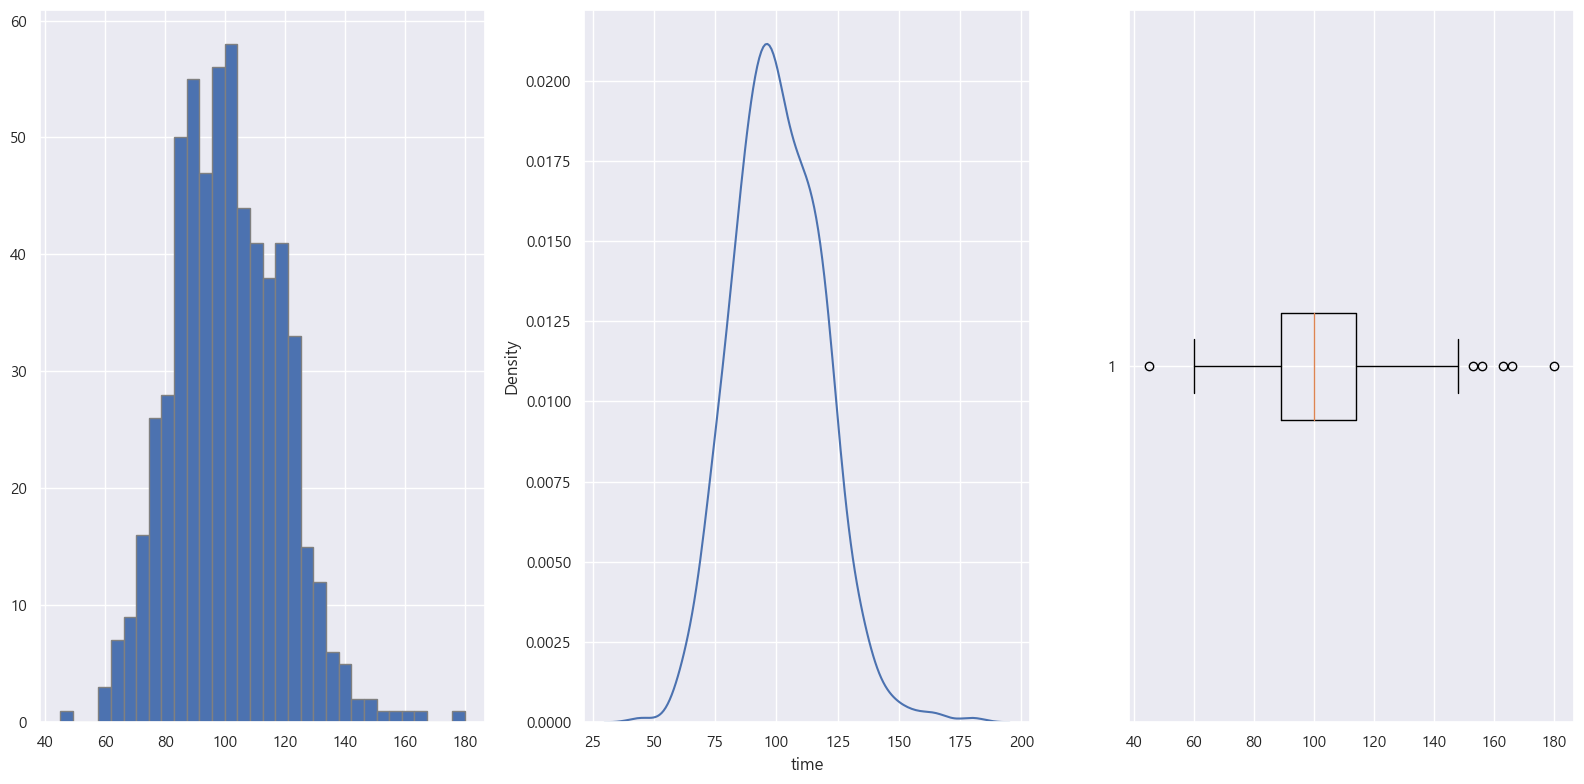

smaller :  [89. 60.]
bigger :  [114. 148.]
count    600.000000
mean     100.863333
std       18.097528
min       45.000000
25%       89.000000
50%      100.000000
75%      114.000000
max      180.000000
Name: time, dtype: float64


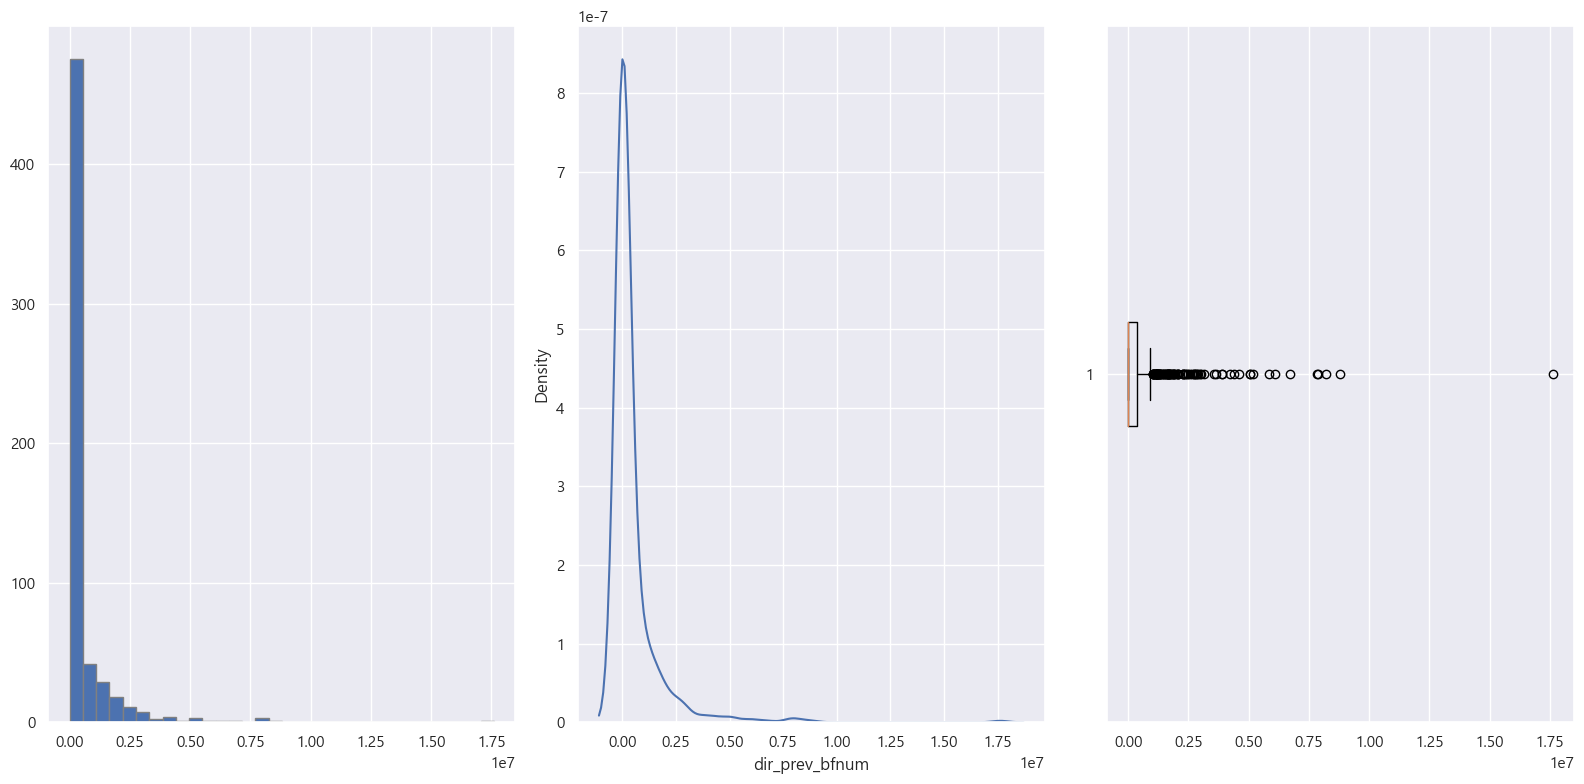

smaller :  [0. 0.]
bigger :  [376141.625 922680.   ]
count    6.000000e+02
mean     4.726993e+05
std      1.309474e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.761416e+05
max      1.761531e+07
Name: dir_prev_bfnum, dtype: float64


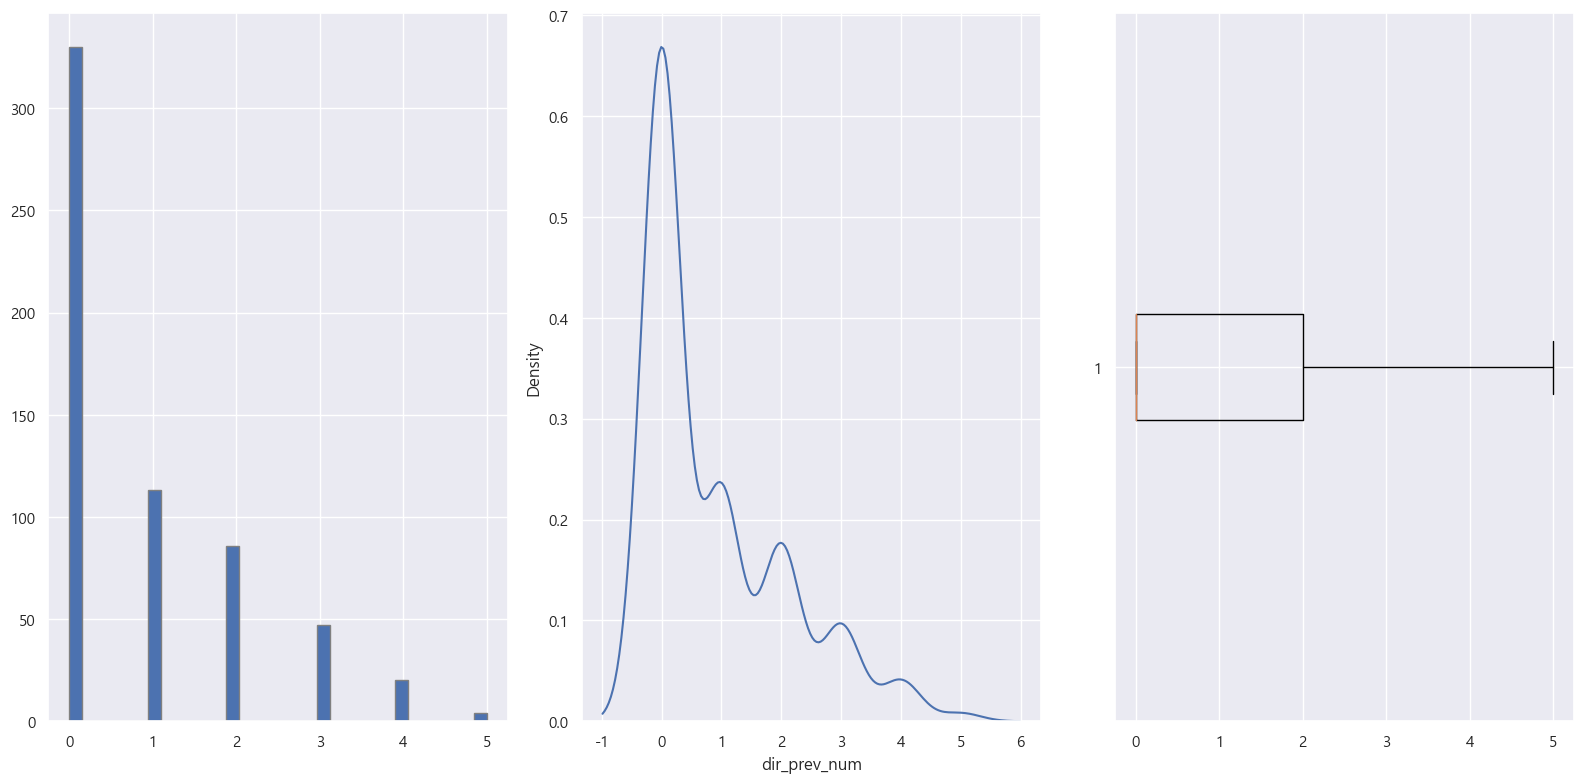

smaller :  [0. 0.]
bigger :  [2. 5.]
count    600.000000
mean       0.876667
std        1.183409
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: dir_prev_num, dtype: float64


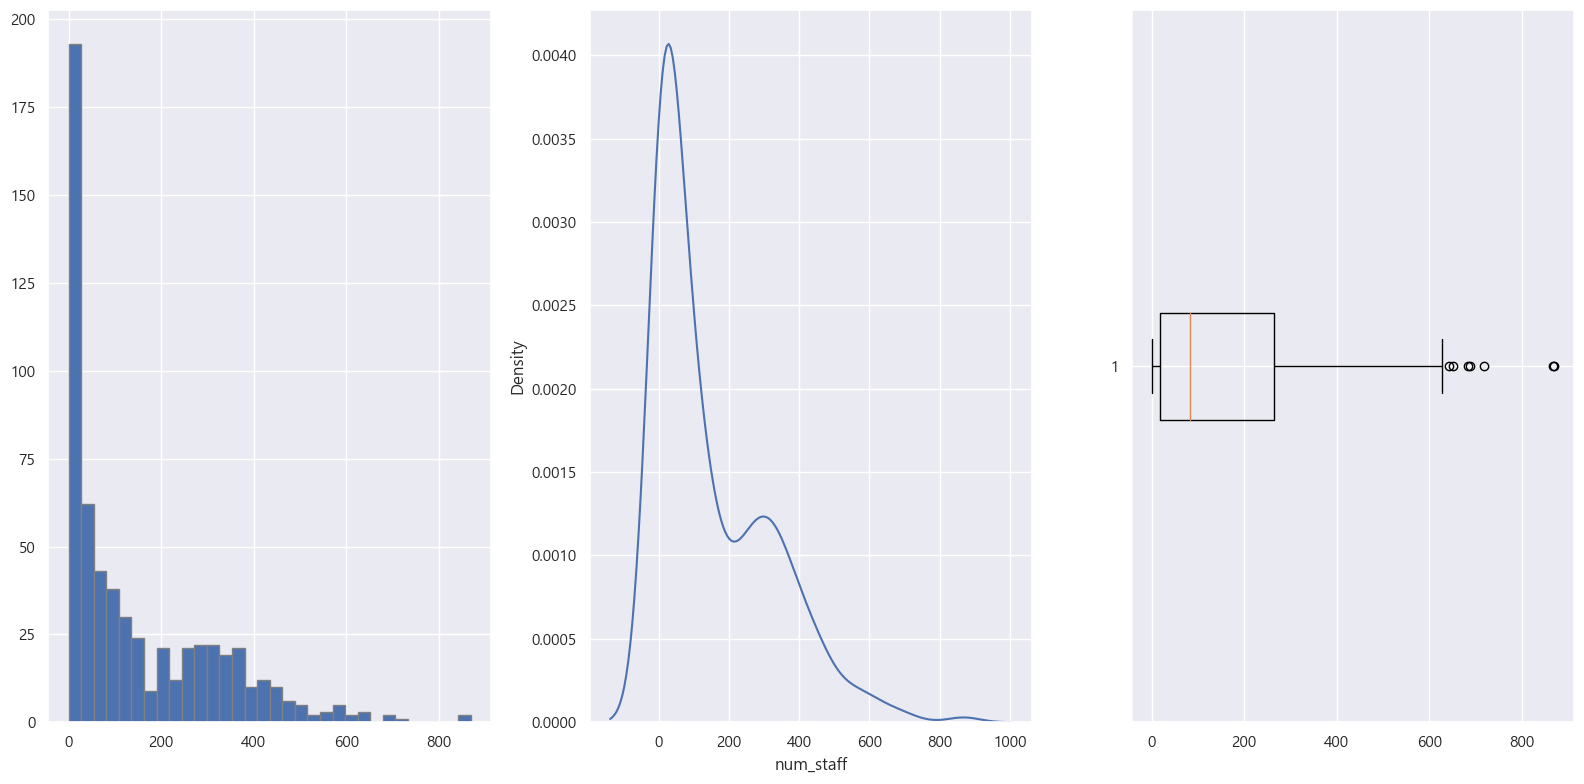

smaller :  [17.  0.]
bigger :  [264. 628.]
count    600.000000
mean     151.118333
std      165.654671
min        0.000000
25%       17.000000
50%       82.500000
75%      264.000000
max      869.000000
Name: num_staff, dtype: float64


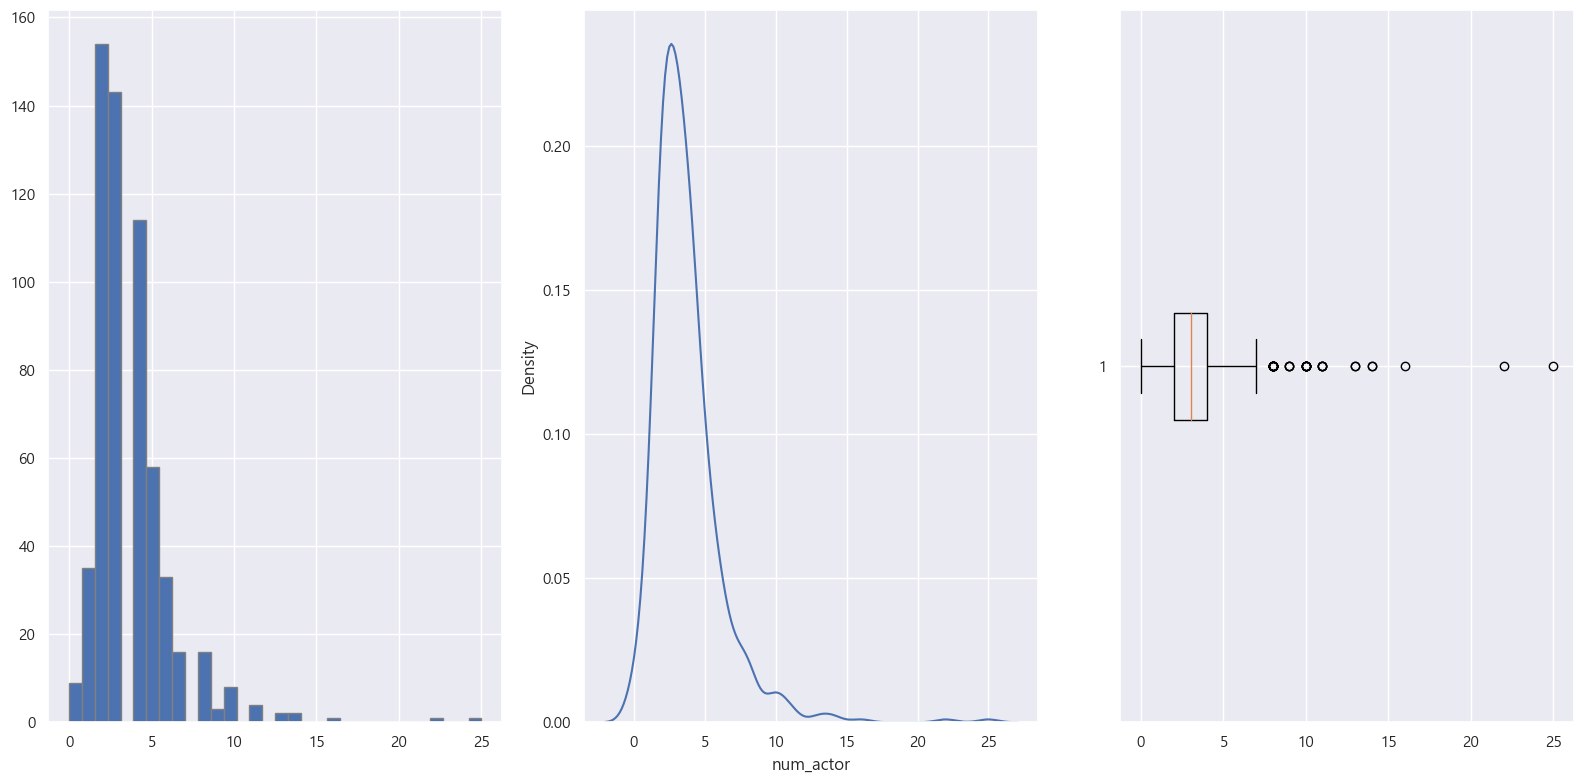

smaller :  [2. 0.]
bigger :  [4. 7.]
count    600.000000
mean       3.706667
std        2.446889
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       25.000000
Name: num_actor, dtype: float64


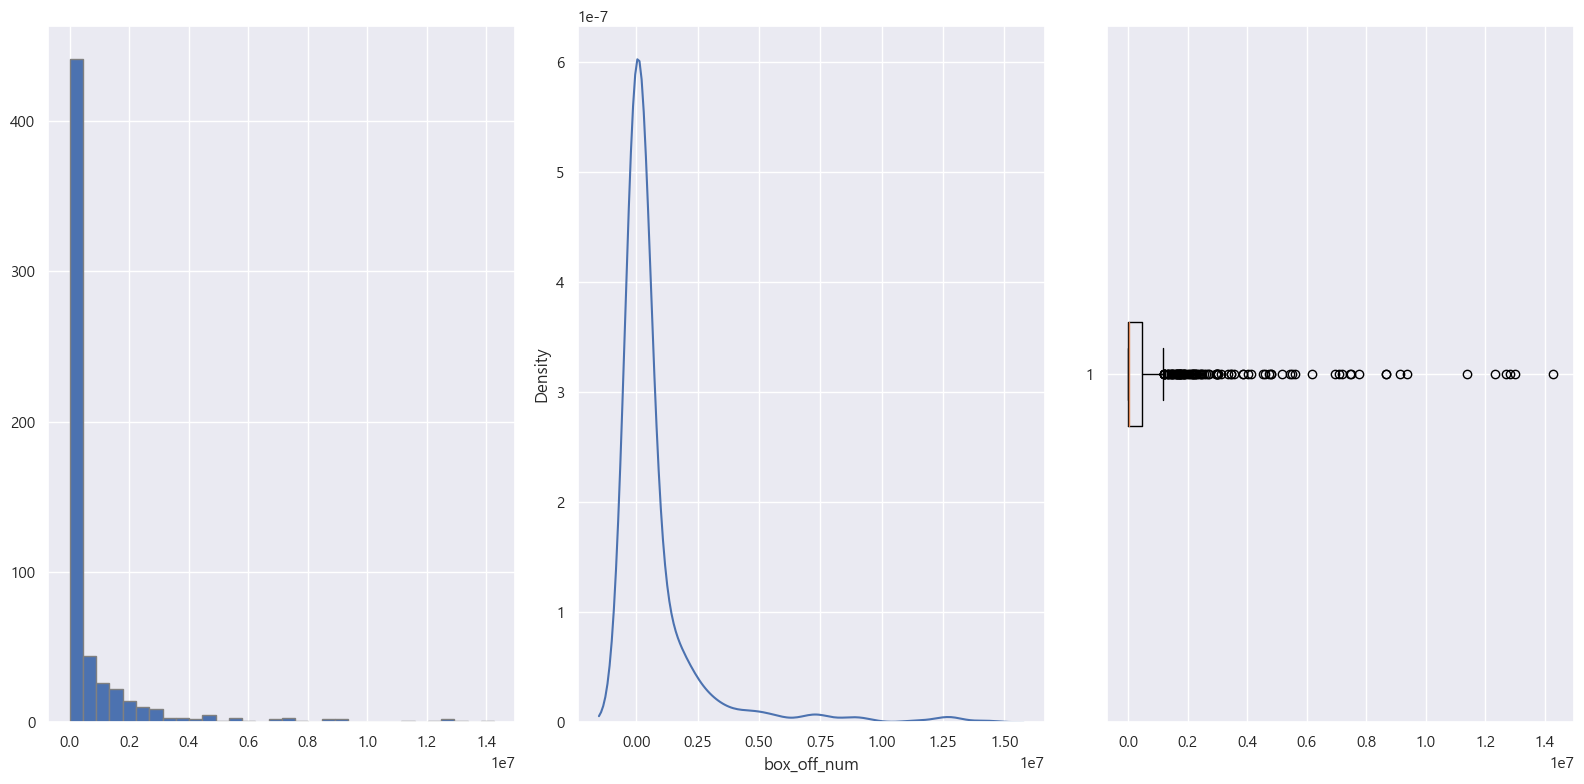

smaller :  [1.29725e+03 1.00000e+00]
bigger :  [ 479886.75 1177435.  ]
count    6.000000e+02
mean     7.081818e+05
std      1.828006e+06
min      1.000000e+00
25%      1.297250e+03
50%      1.259100e+04
75%      4.798868e+05
max      1.426277e+07
Name: box_off_num, dtype: float64
0    0.663333
1    0.336667
Name: screening_rat_15세 관람가, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


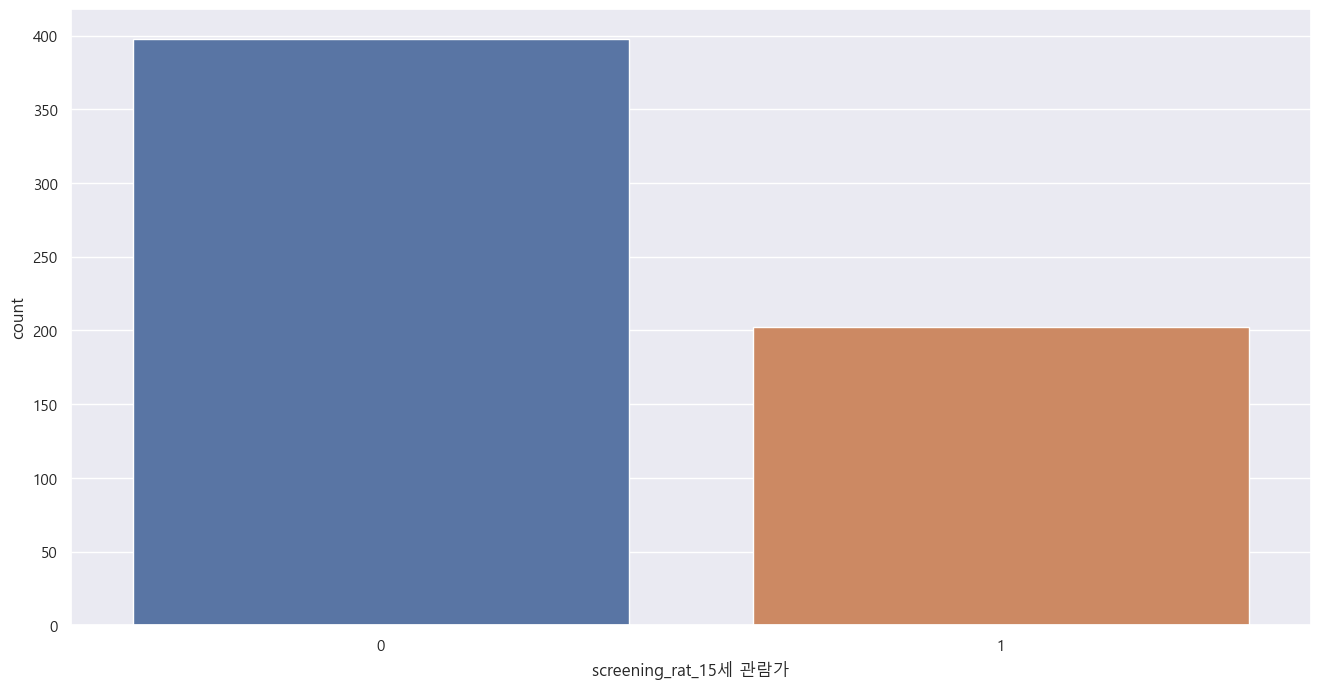

0    0.846667
1    0.153333
Name: screening_rat_전체 관람가, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


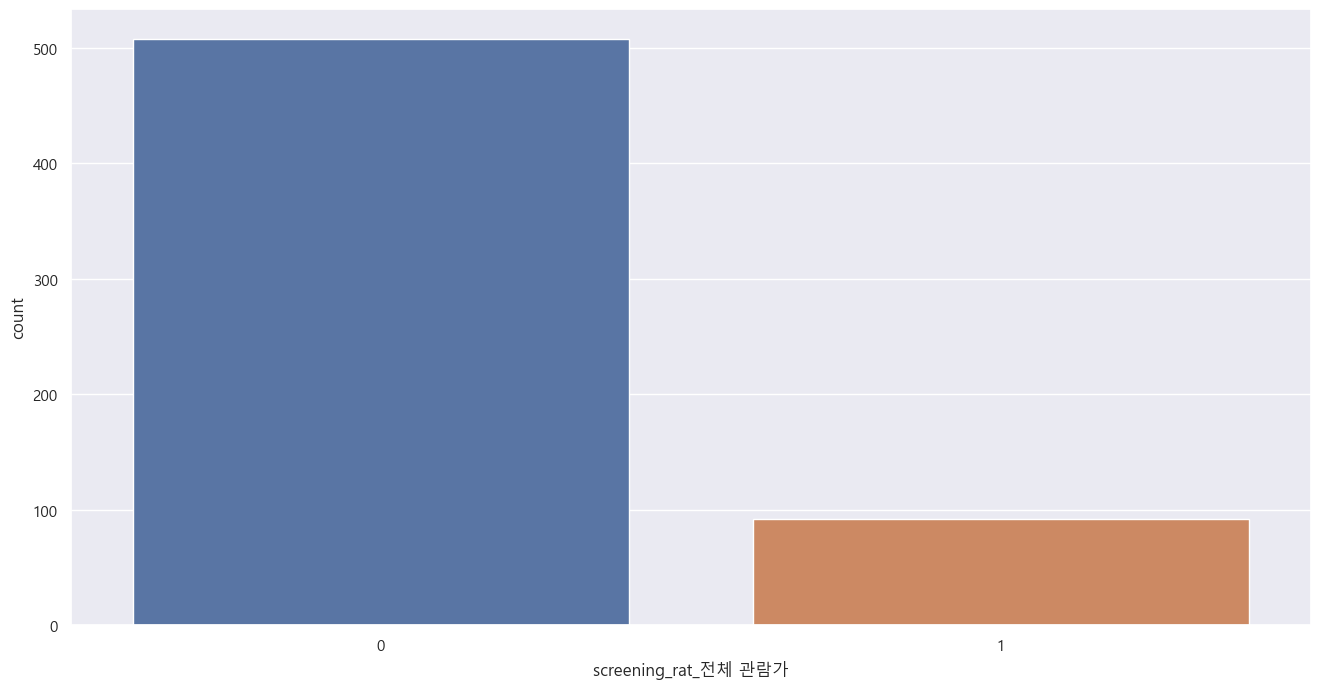

0    0.66
1    0.34
Name: screening_rat_청소년 관람불가, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


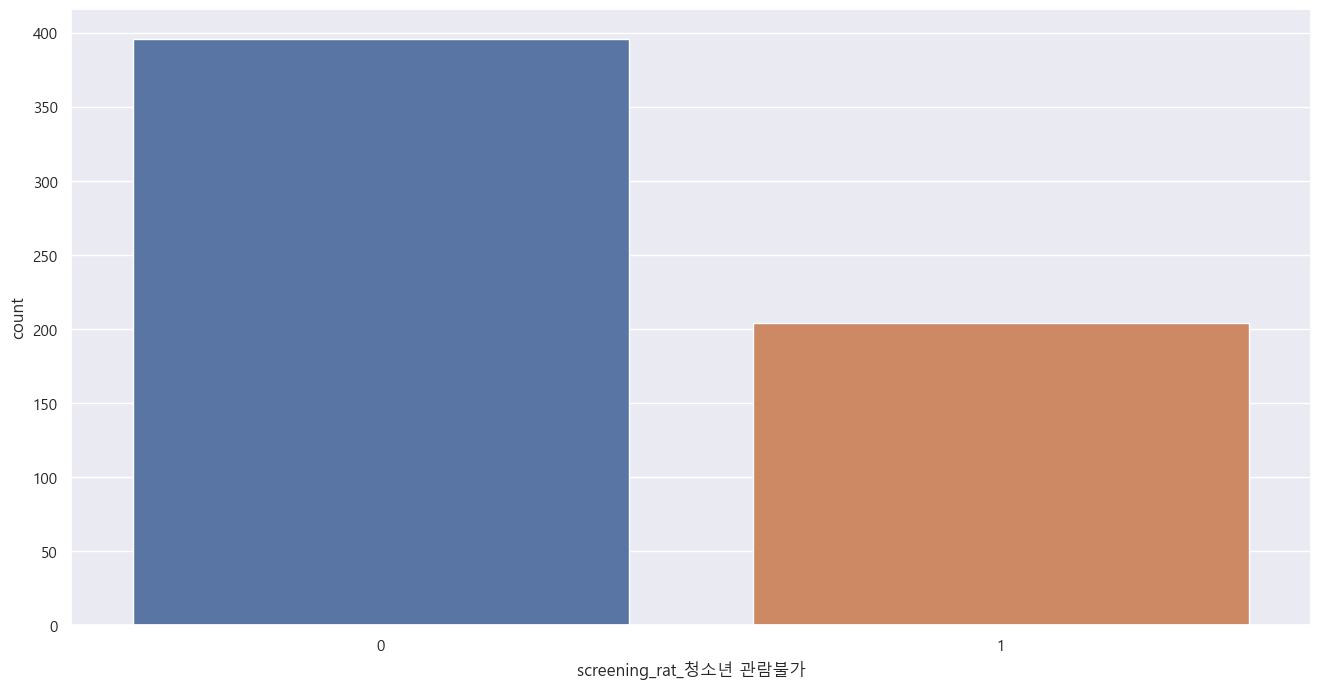

0    0.93
1    0.07
Name: genre_공포, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


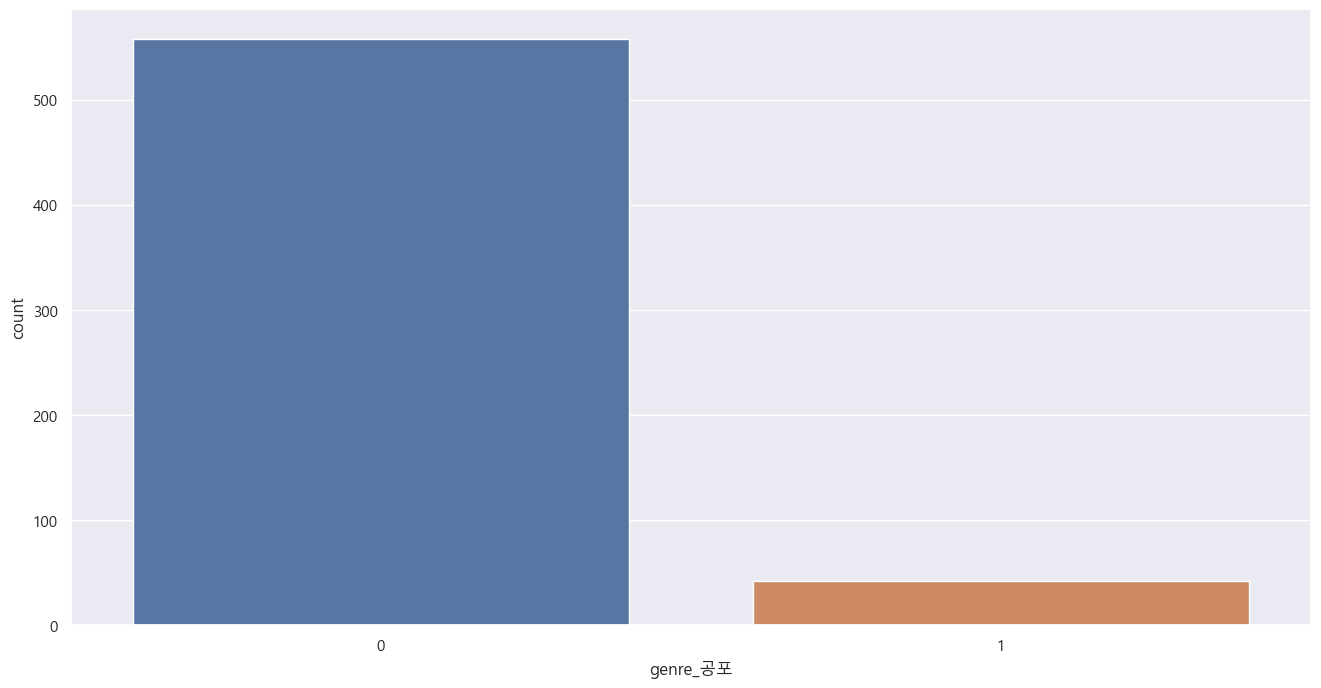

0    0.955
1    0.045
Name: genre_느와르, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


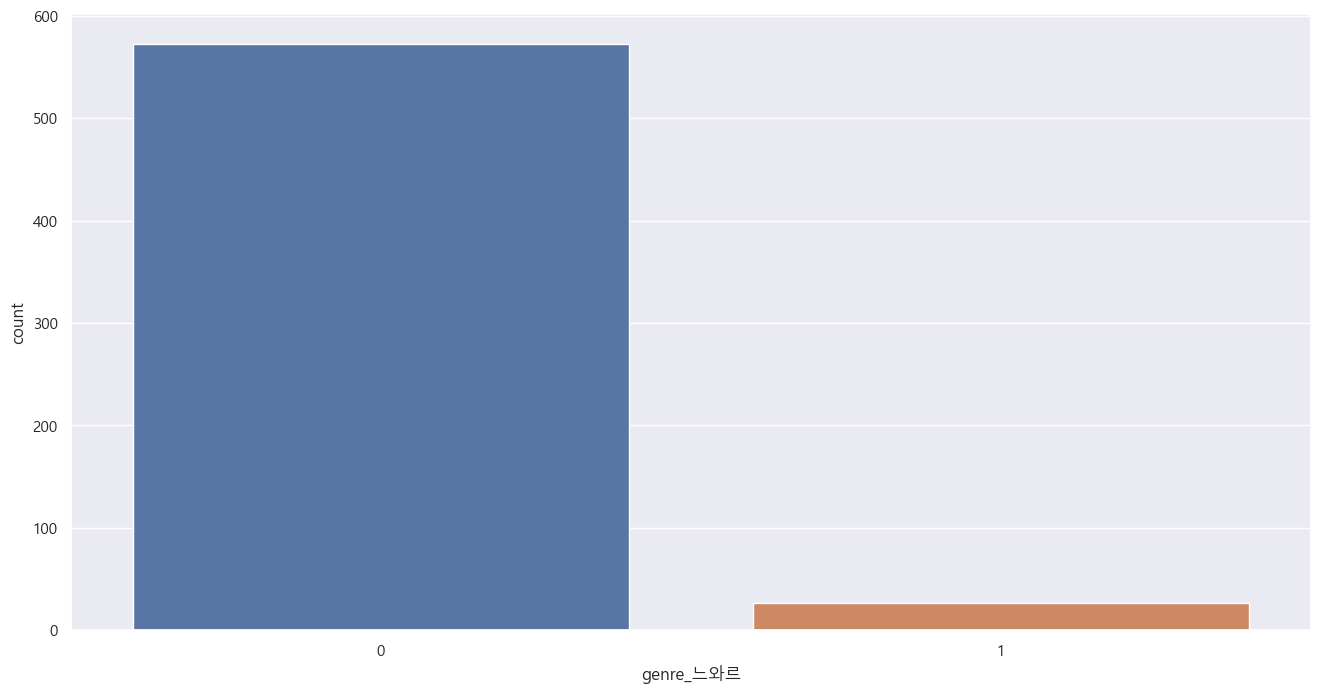

0    0.845
1    0.155
Name: genre_다큐멘터리, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


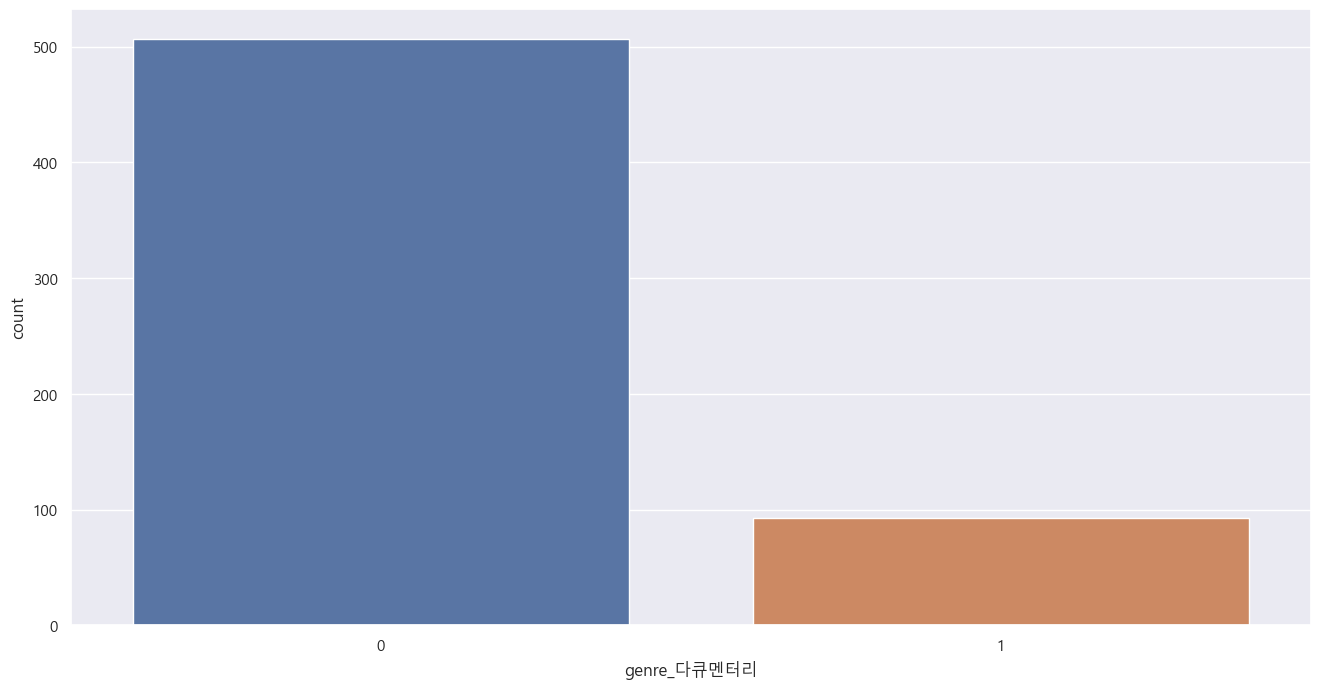

0    0.631667
1    0.368333
Name: genre_드라마, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


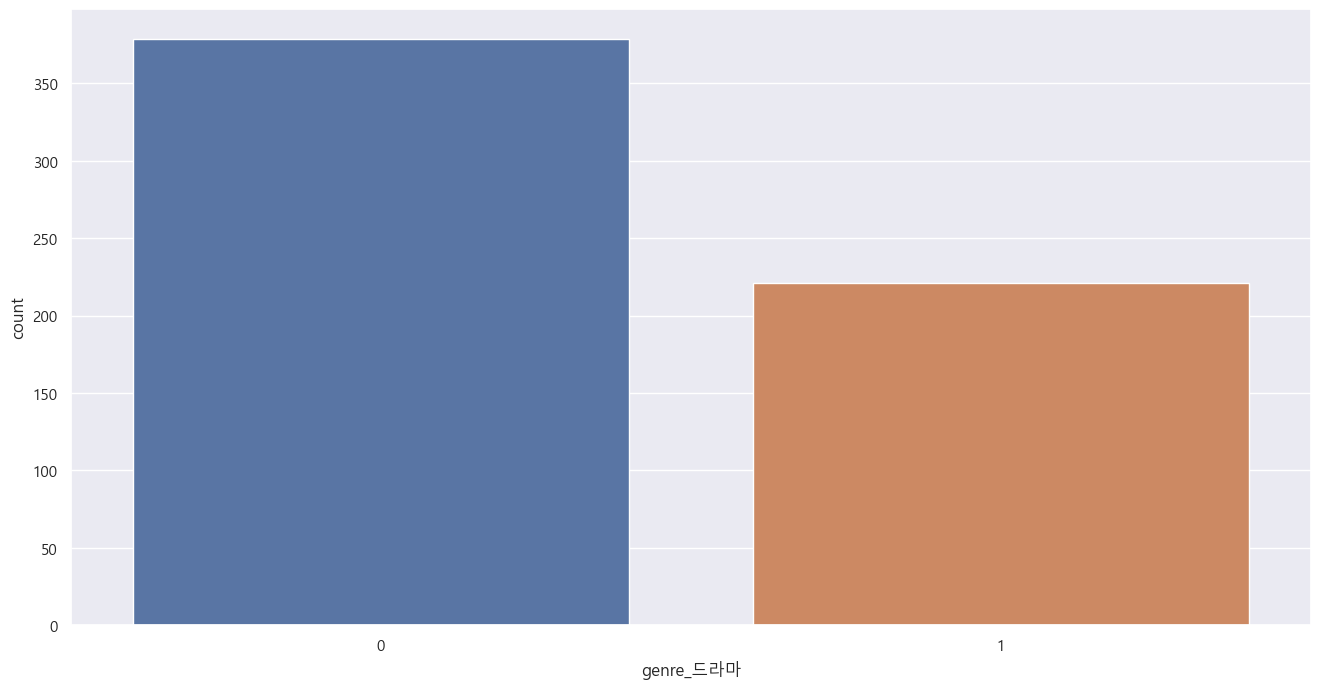

0    0.87
1    0.13
Name: genre_멜로/로맨스, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


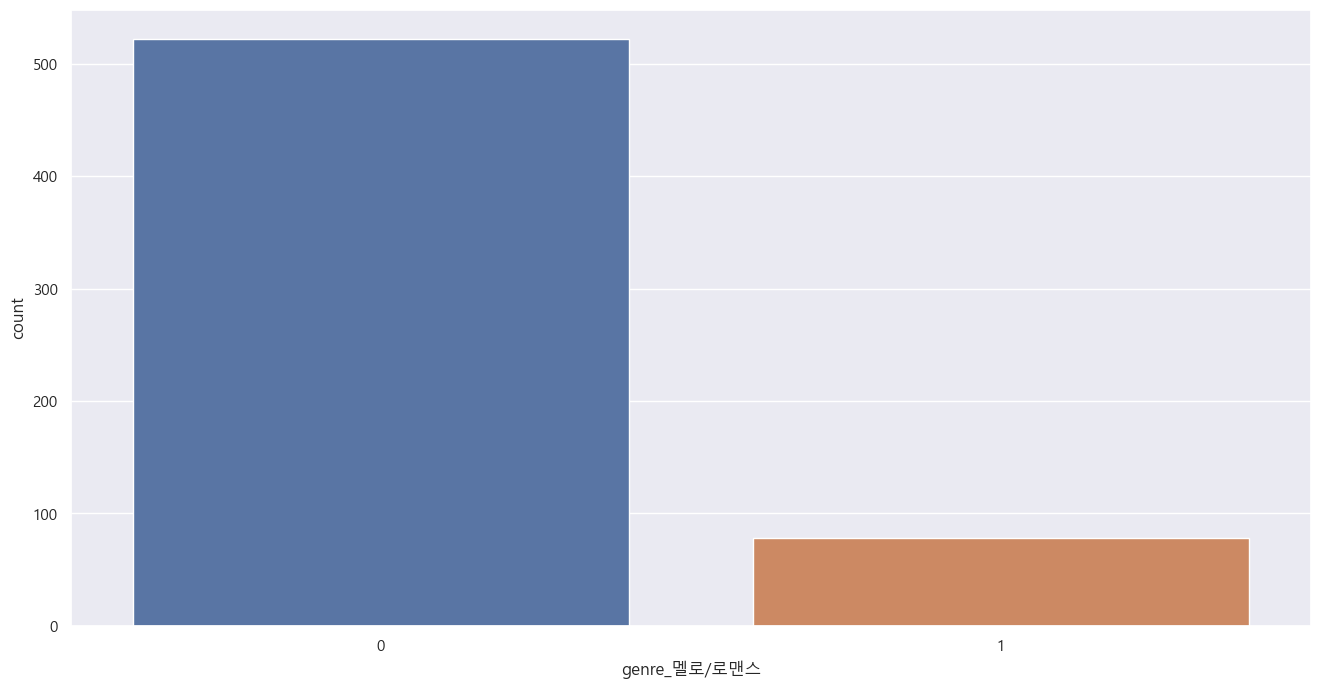

0    0.991667
1    0.008333
Name: genre_뮤지컬, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


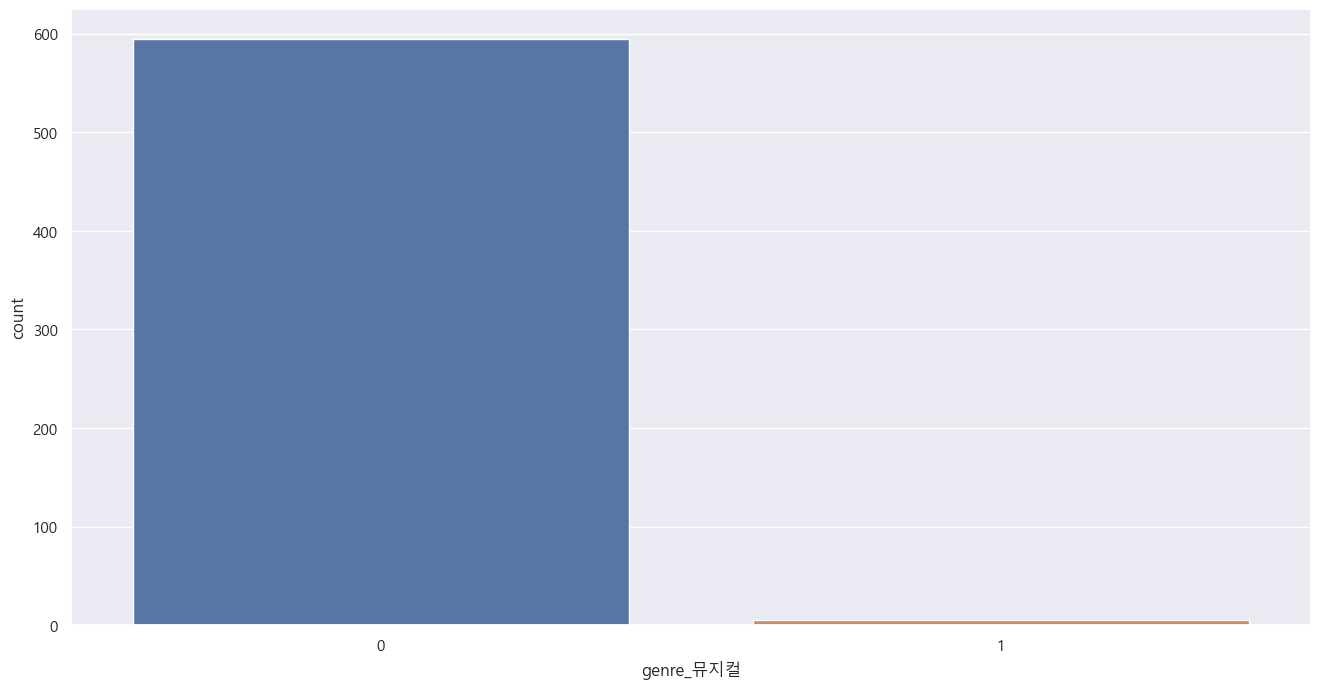

0    0.971667
1    0.028333
Name: genre_미스터리, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


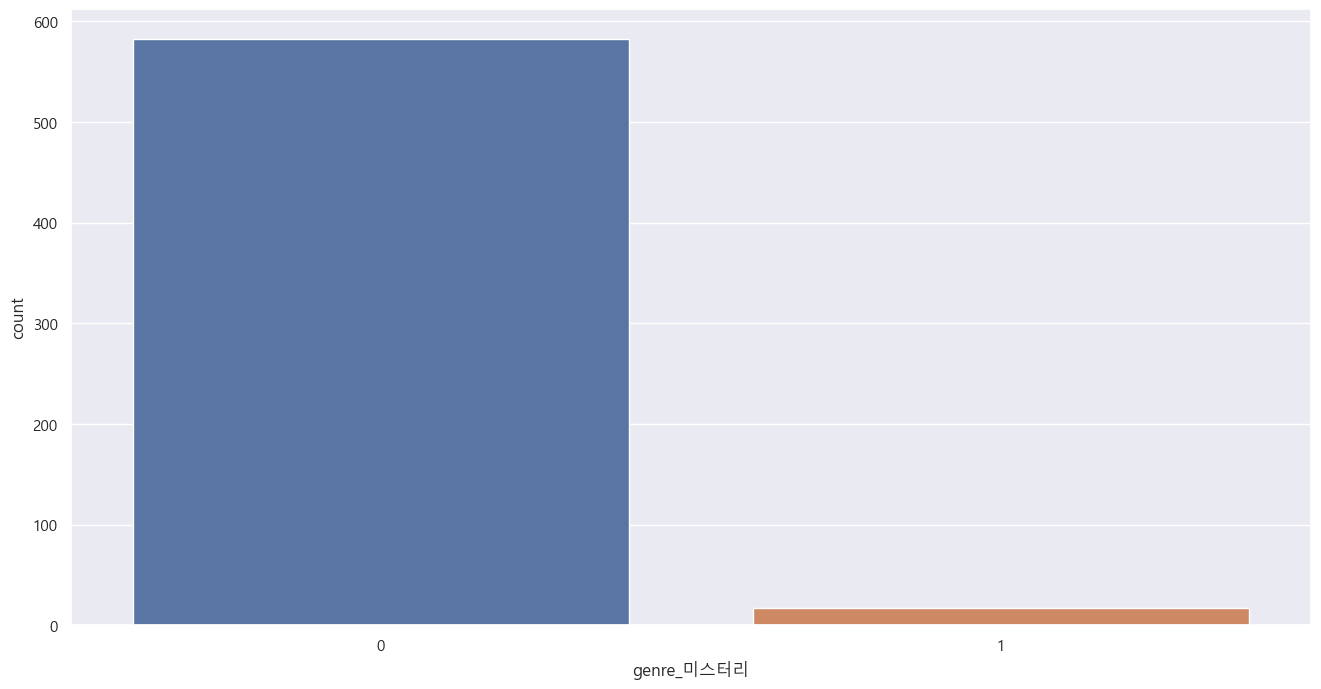

0    0.996667
1    0.003333
Name: genre_서스펜스, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


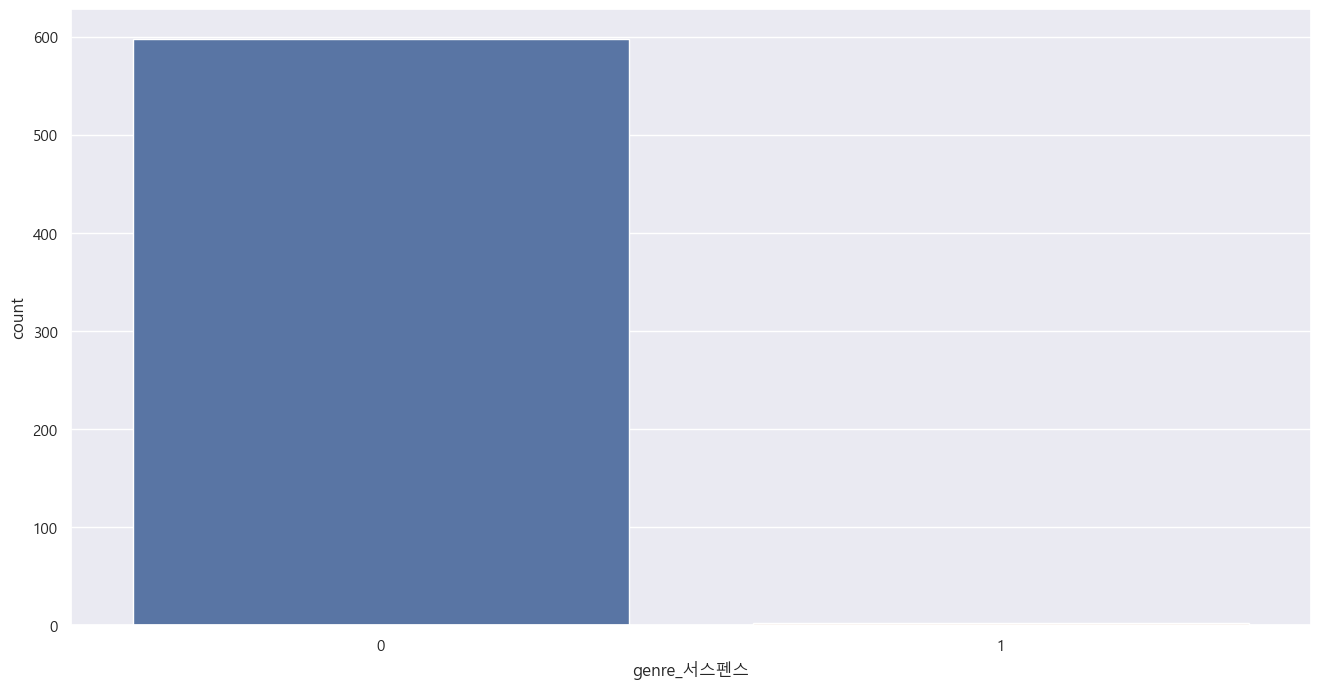

0    0.965
1    0.035
Name: genre_애니메이션, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


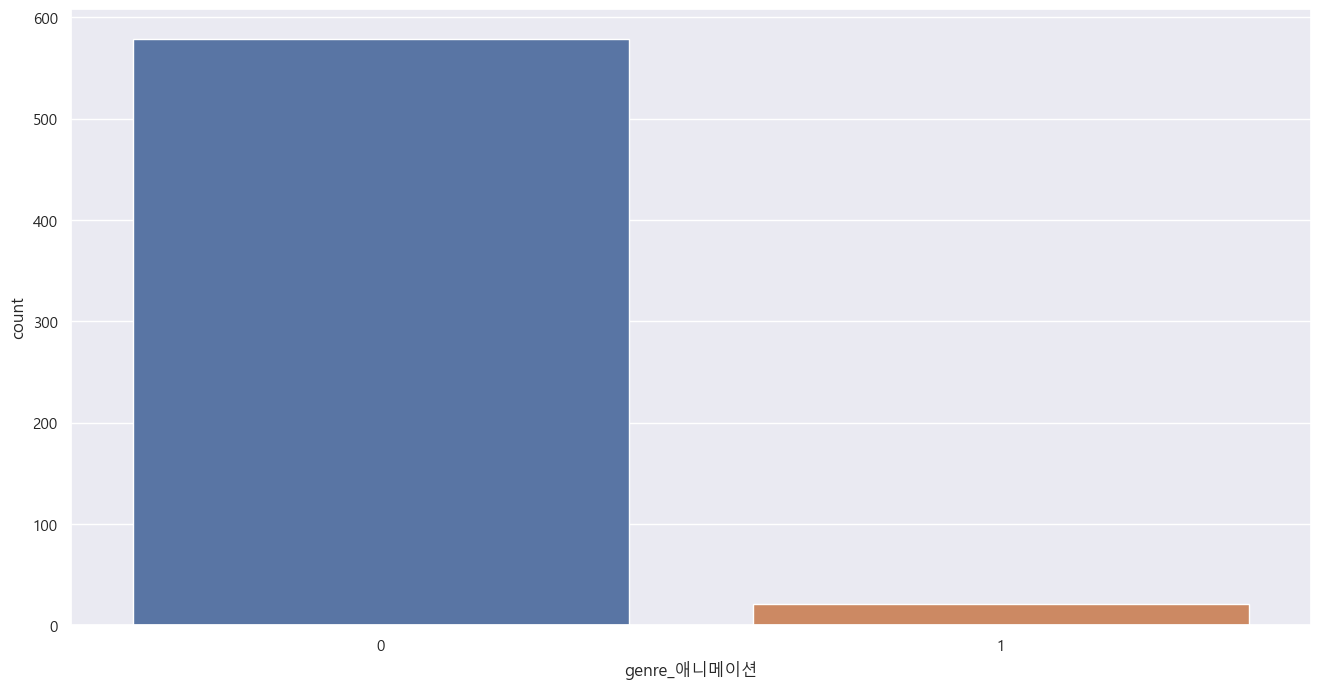

0    0.953333
1    0.046667
Name: genre_액션, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


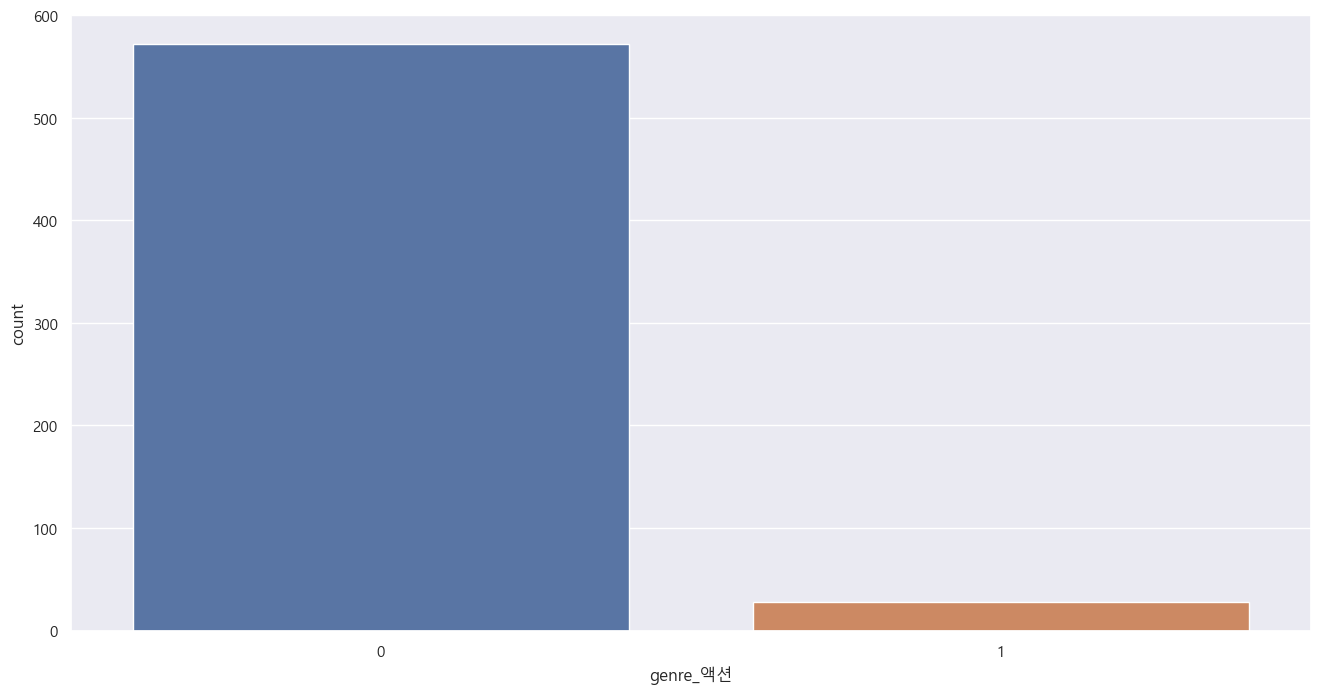

0    0.911667
1    0.088333
Name: genre_코미디, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


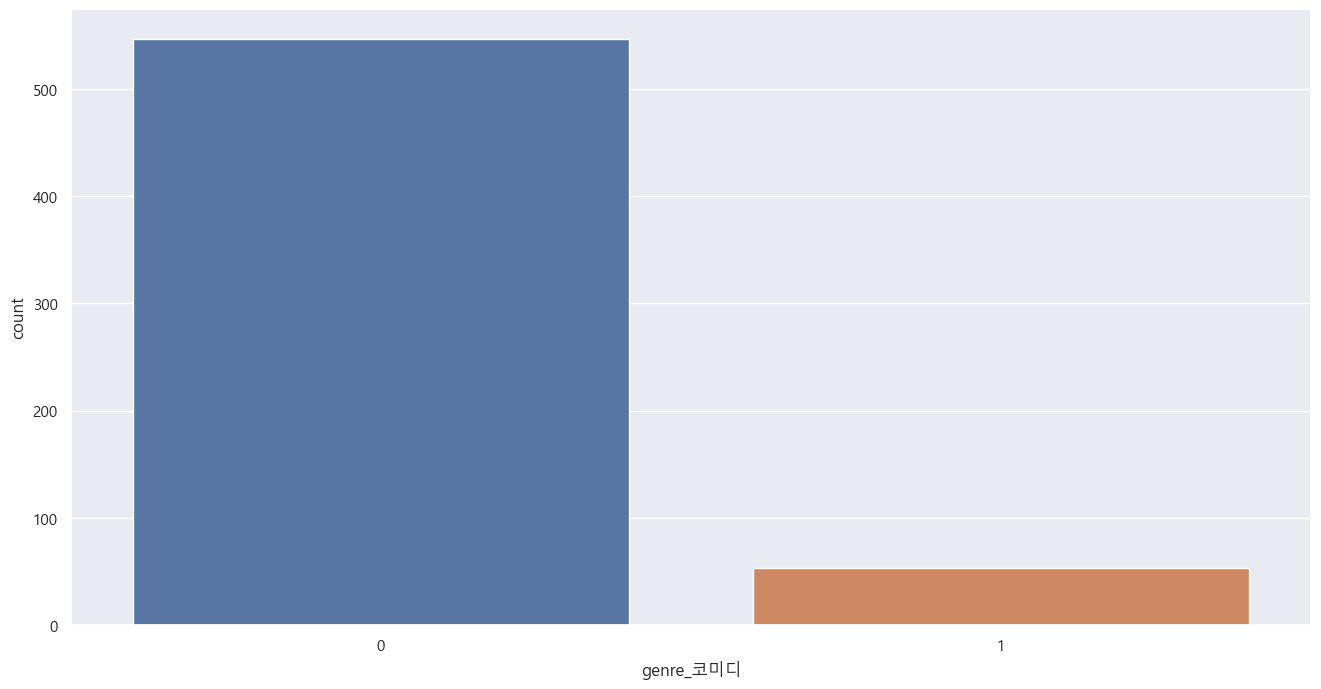

0    0.951667
1    0.048333
Name: distributor_(주)마운틴픽쳐스, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


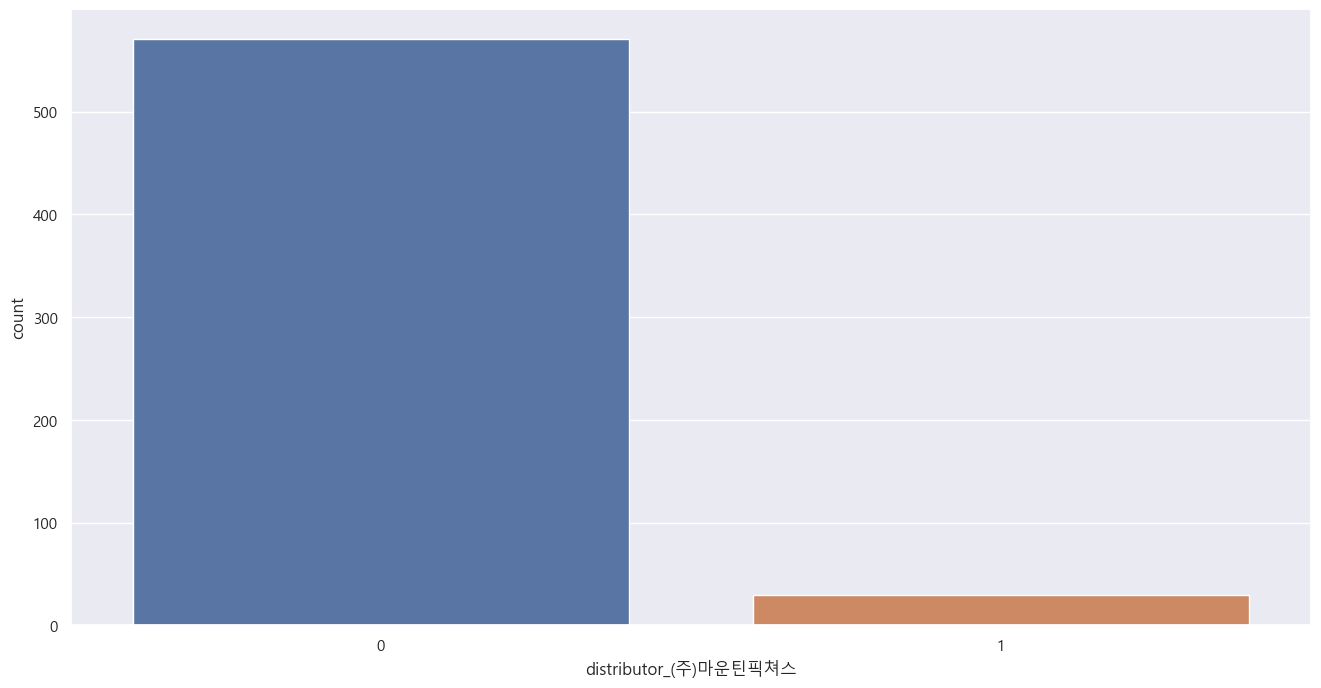

0    0.956667
1    0.043333
Name: distributor_(주)쇼박스, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


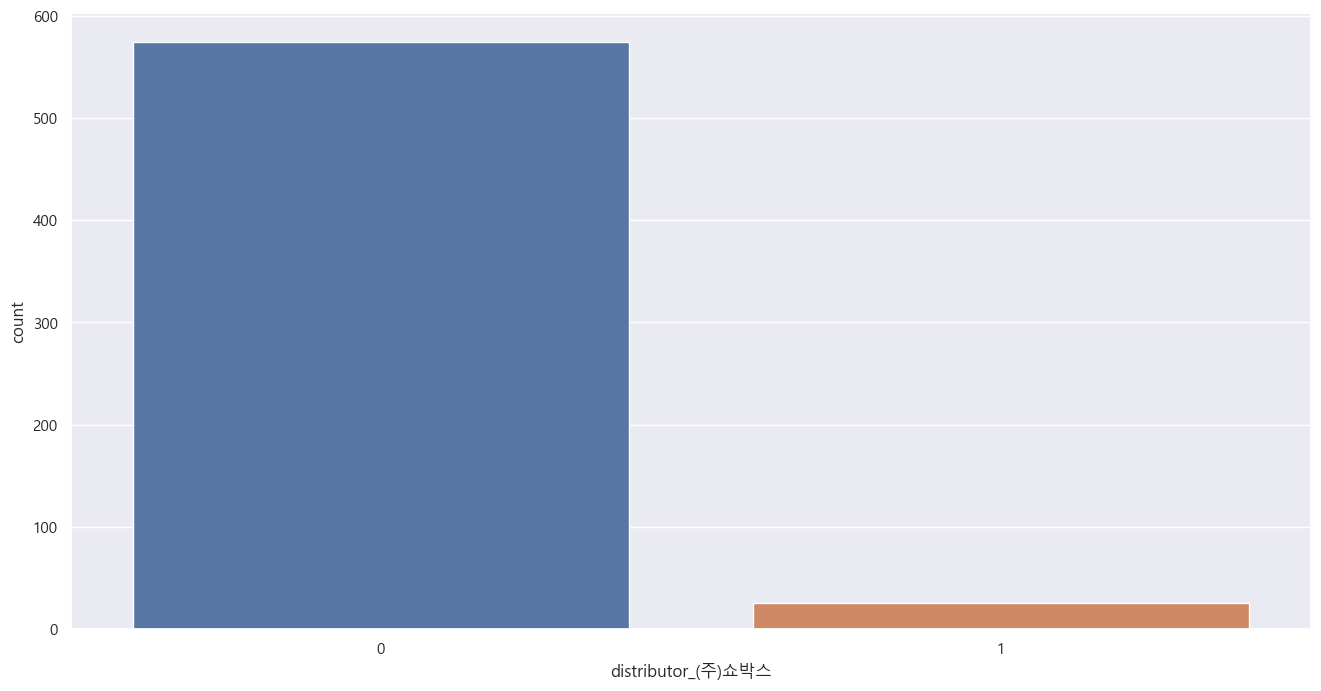

0    0.91
1    0.09
Name: distributor_CJ 엔터테인먼트, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


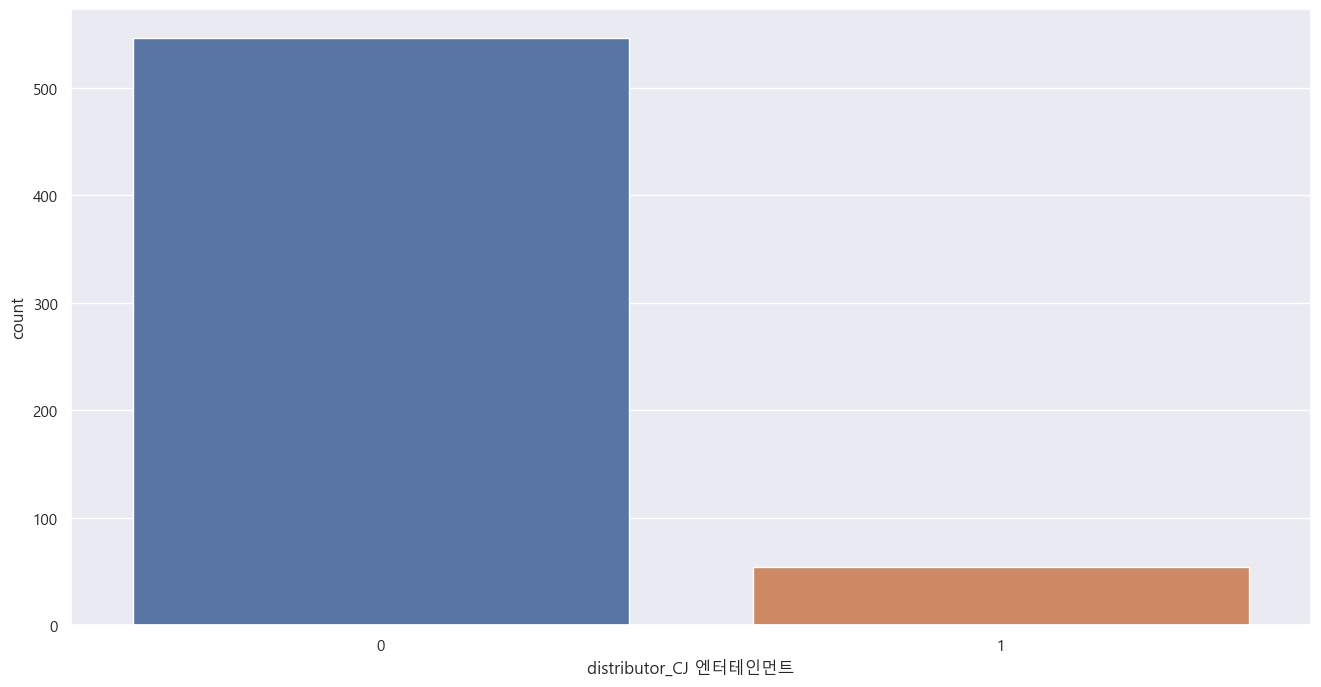

1    0.638333
0    0.361667
Name: distributor_기타, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


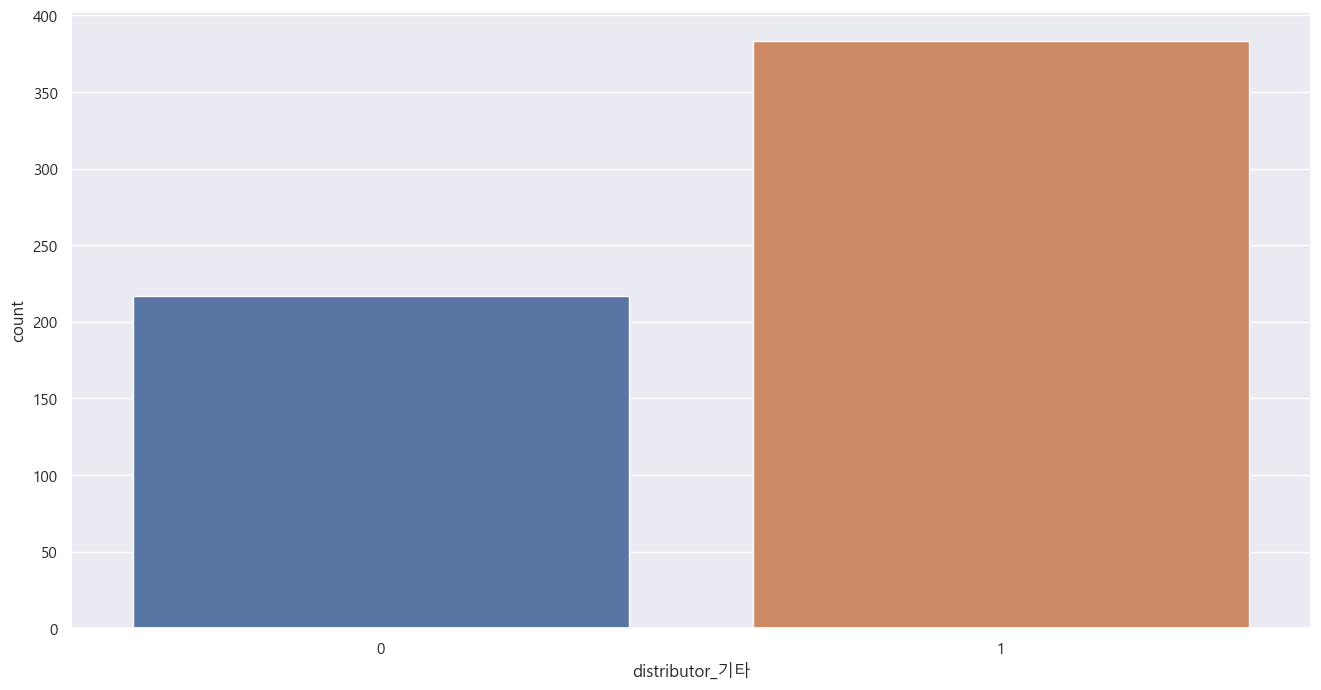

0    0.913333
1    0.086667
Name: distributor_롯데엔터테인먼트, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


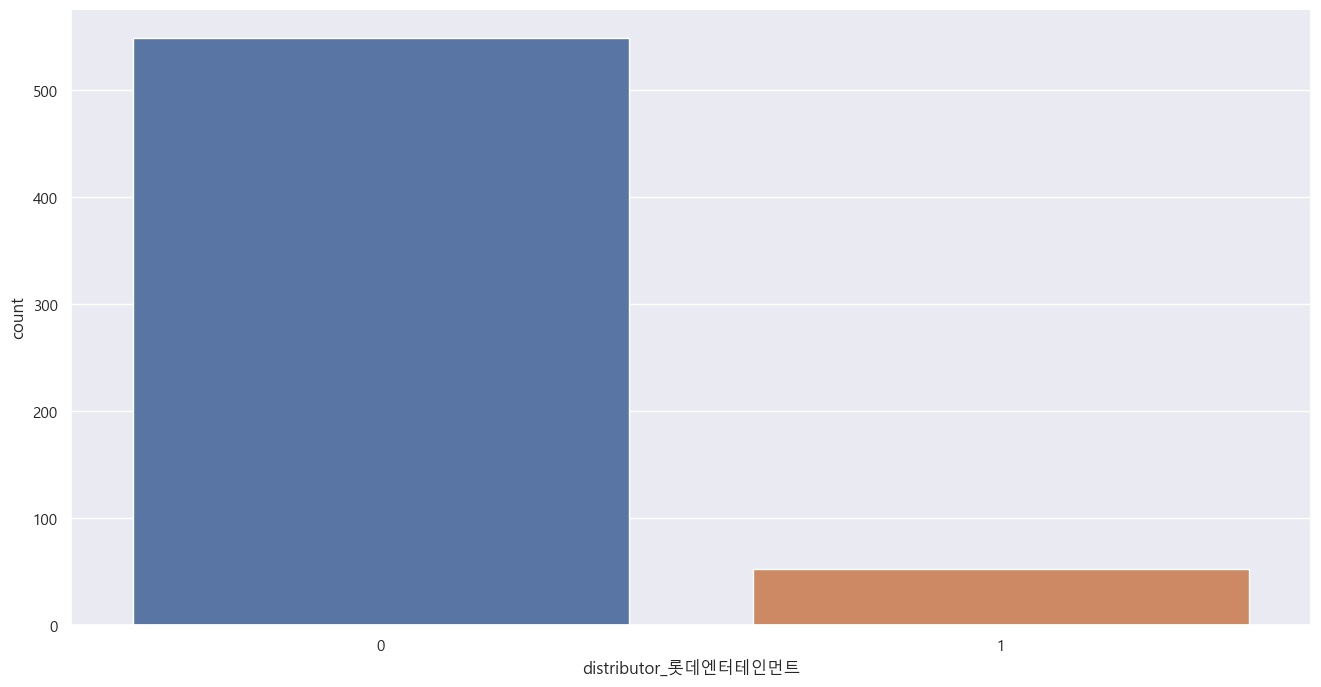

0    0.956667
1    0.043333
Name: distributor_인디스토리, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


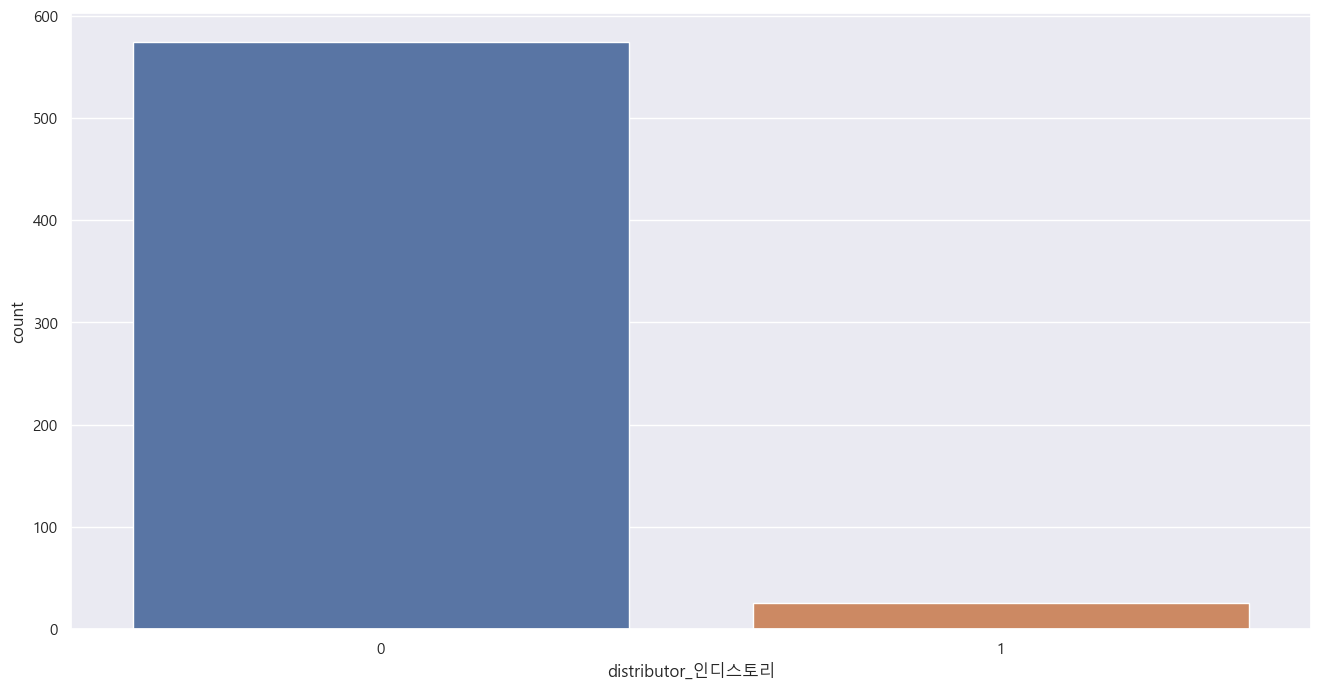

0    0.866667
1    0.133333
Name: 년_2011, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


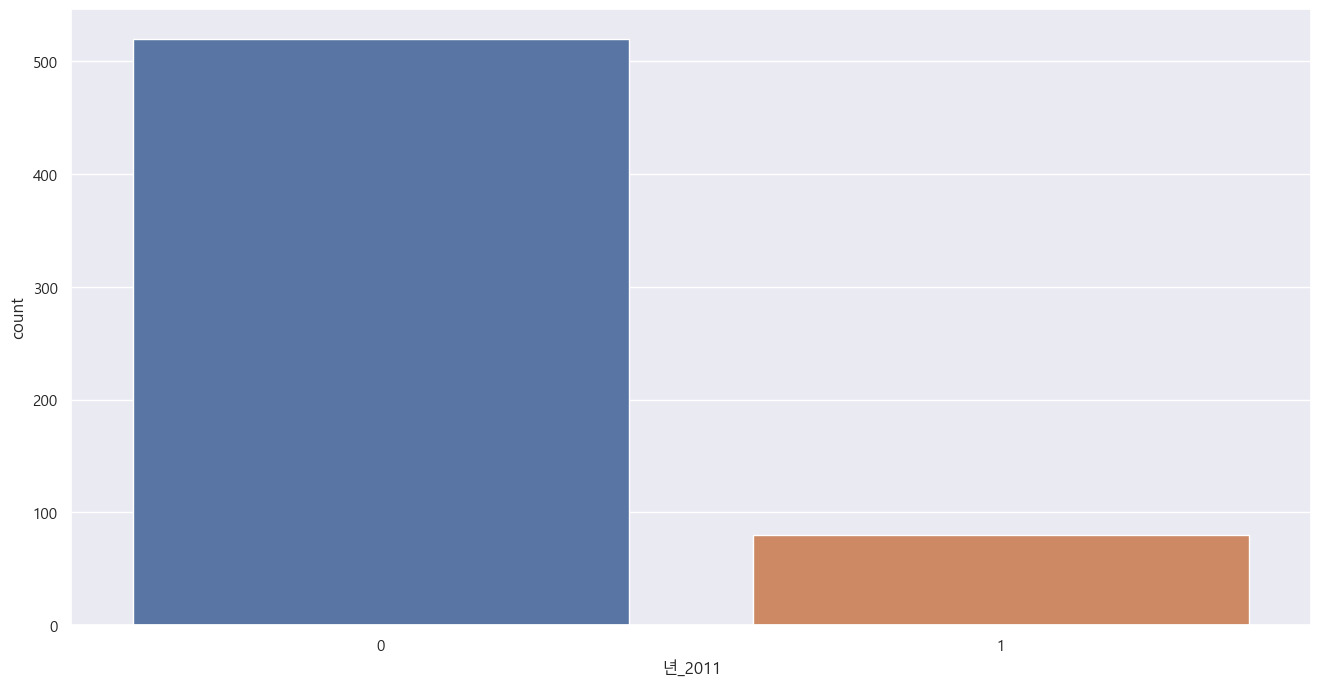

0    0.853333
1    0.146667
Name: 년_2012, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


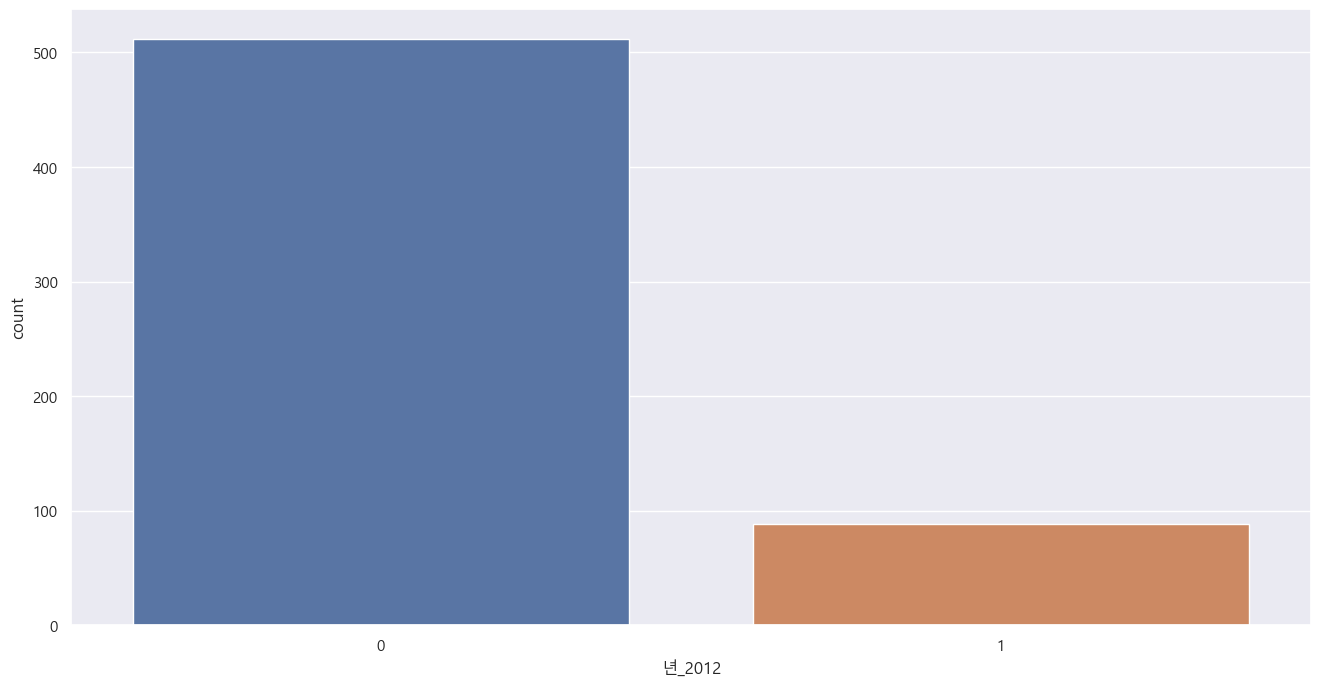

0    0.841667
1    0.158333
Name: 년_2013, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


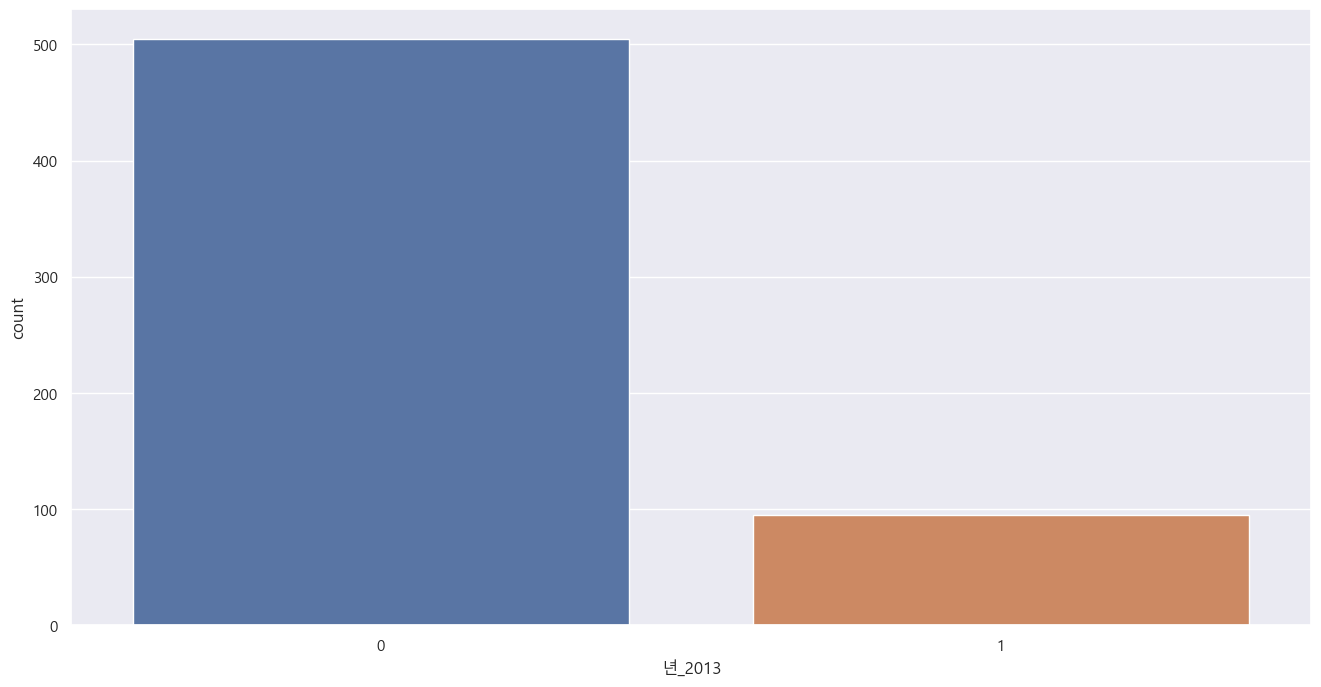

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    0.788333
1    0.211667
Name: 년_2014, dtype: float64


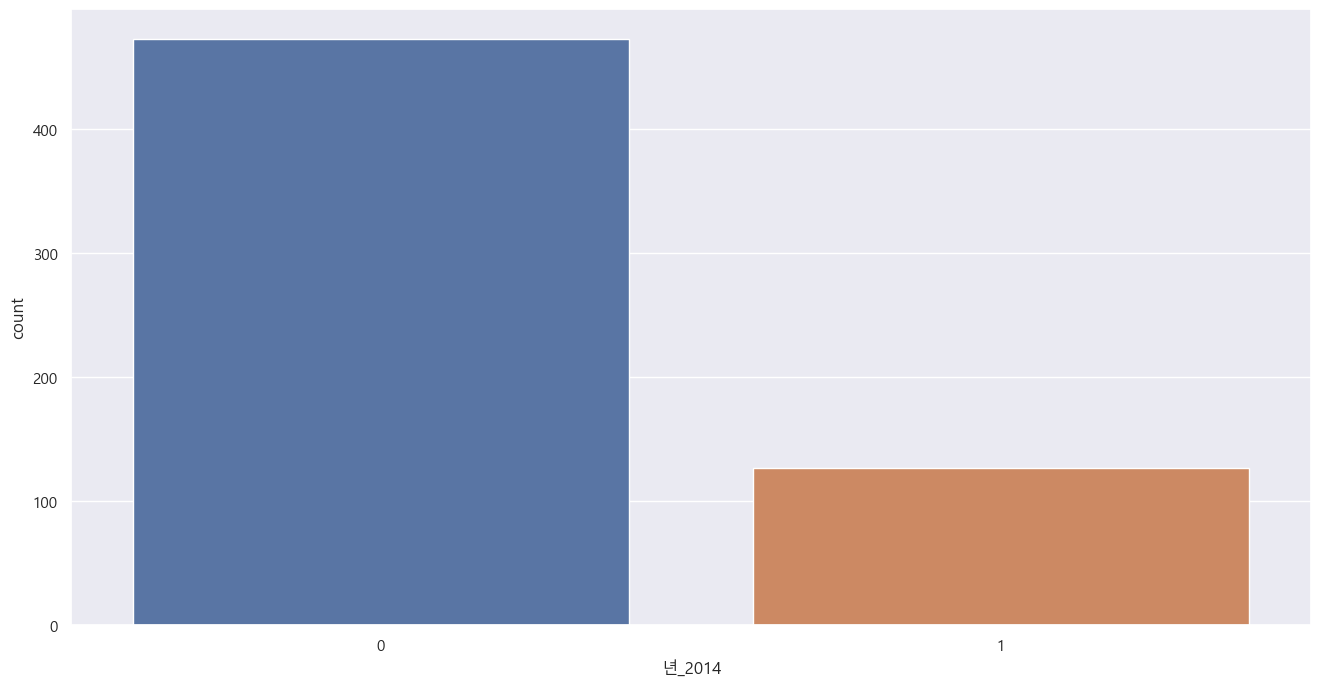

0    0.8
1    0.2
Name: 년_2015, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


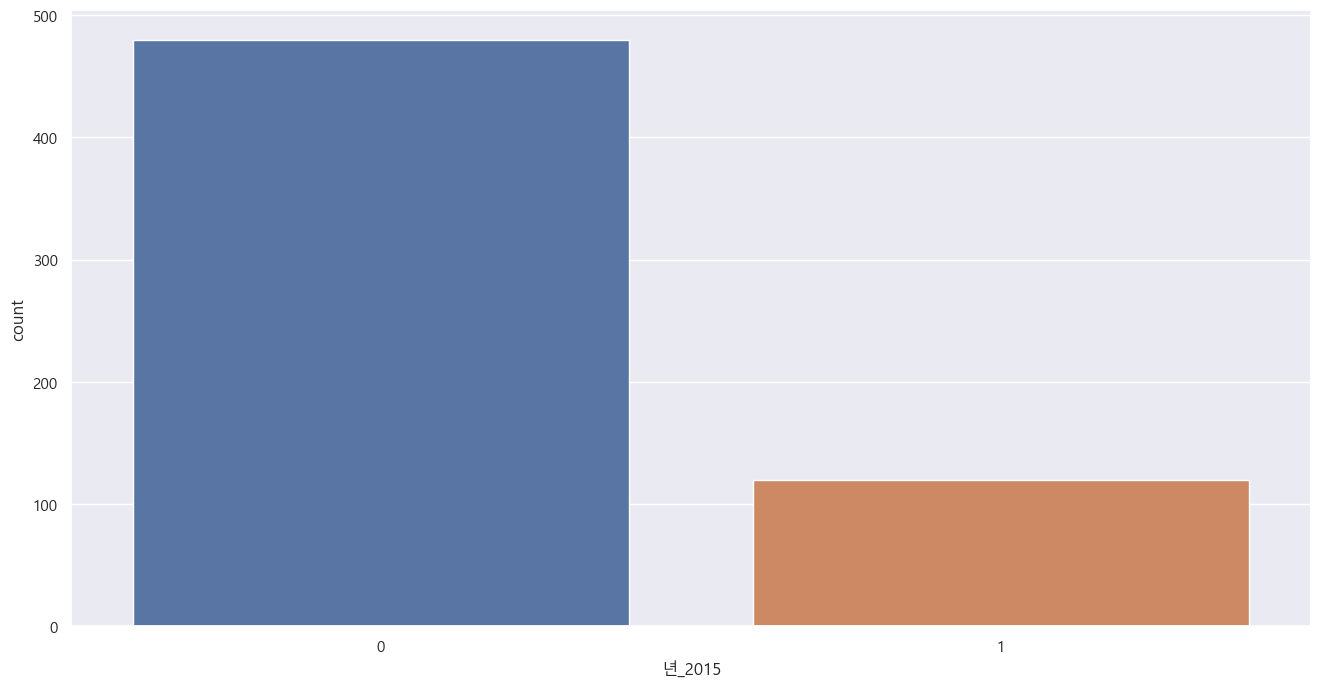

0    0.948333
1    0.051667
Name: 월_2, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


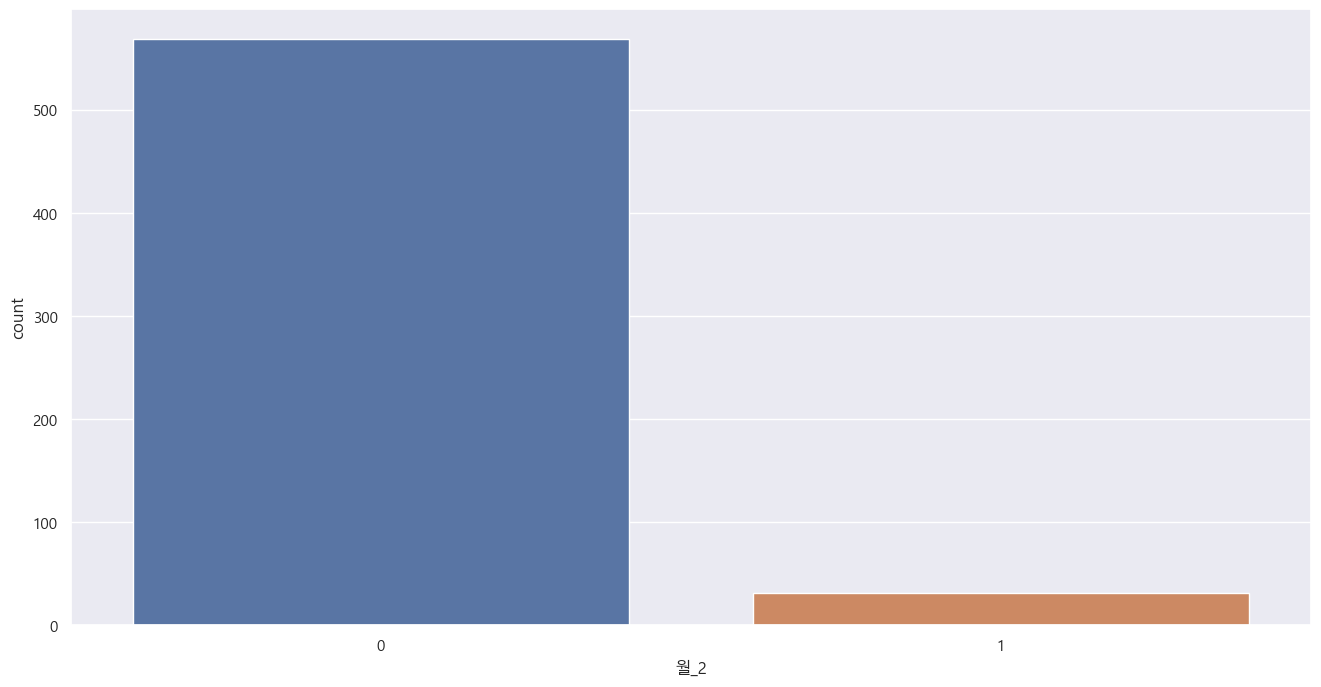

0    0.913333
1    0.086667
Name: 월_3, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


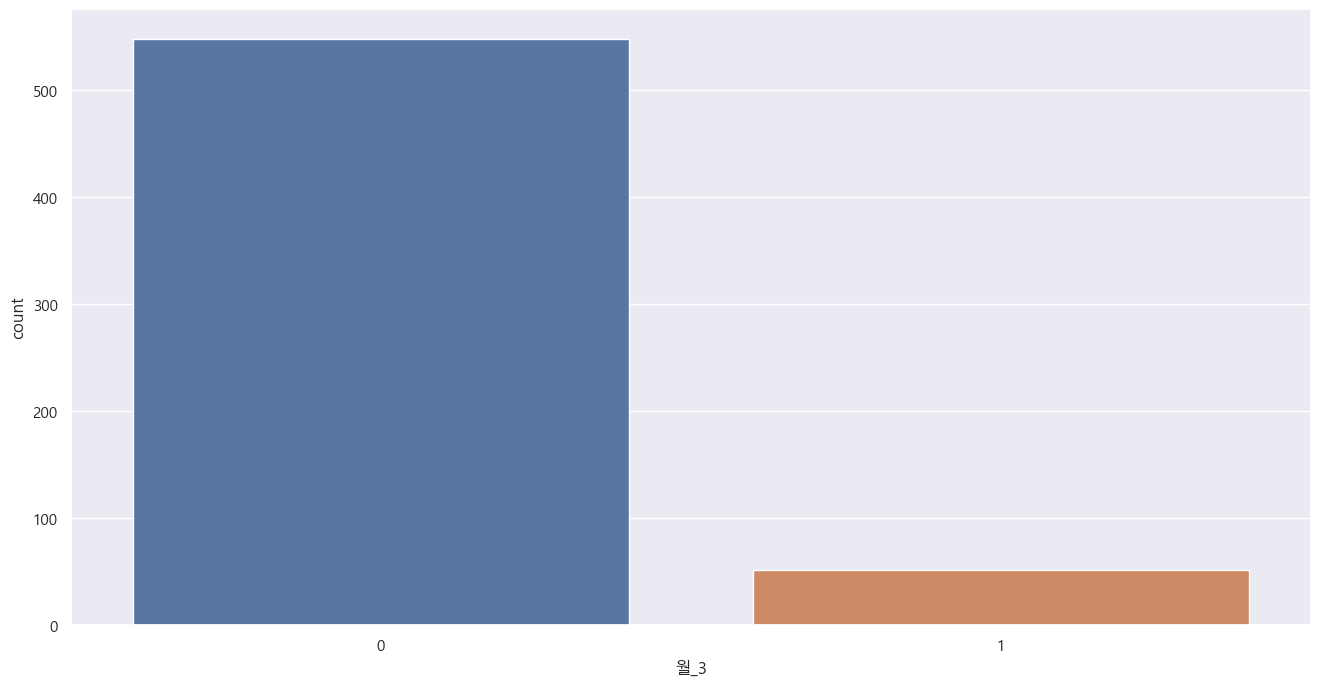

0    0.921667
1    0.078333
Name: 월_4, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


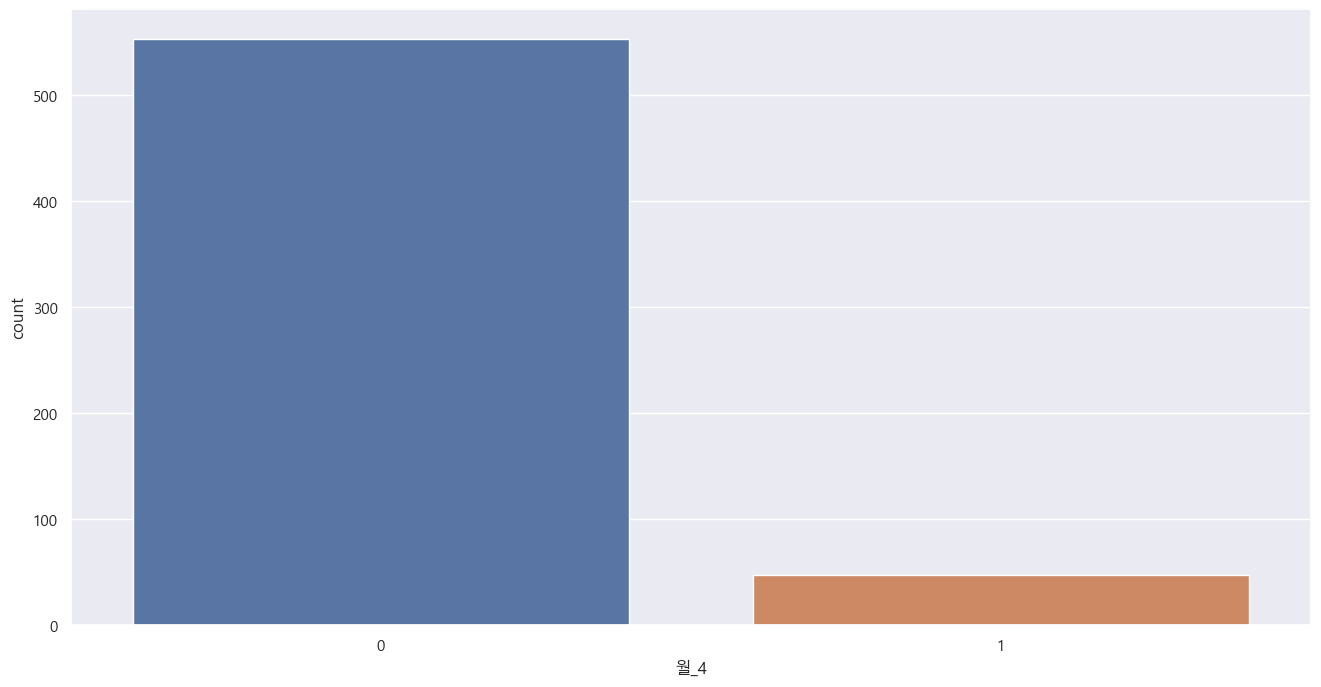

0    0.905
1    0.095
Name: 월_5, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


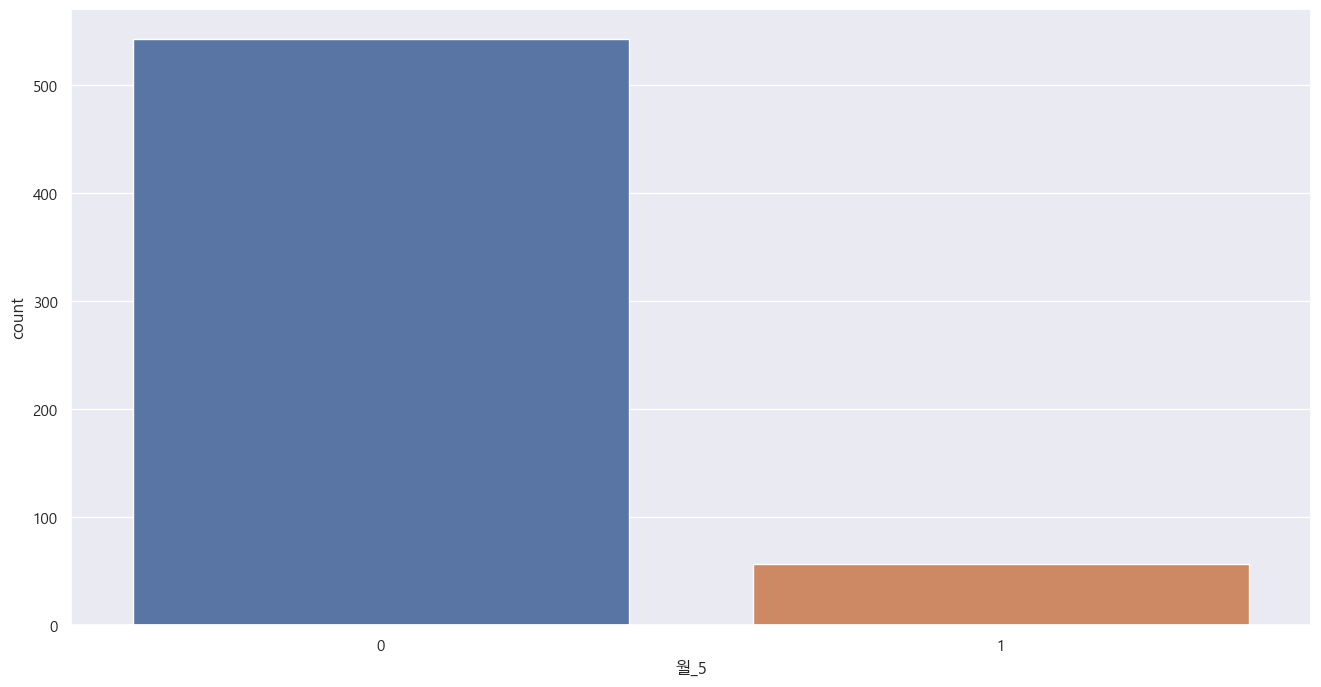

0    0.951667
1    0.048333
Name: 월_6, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


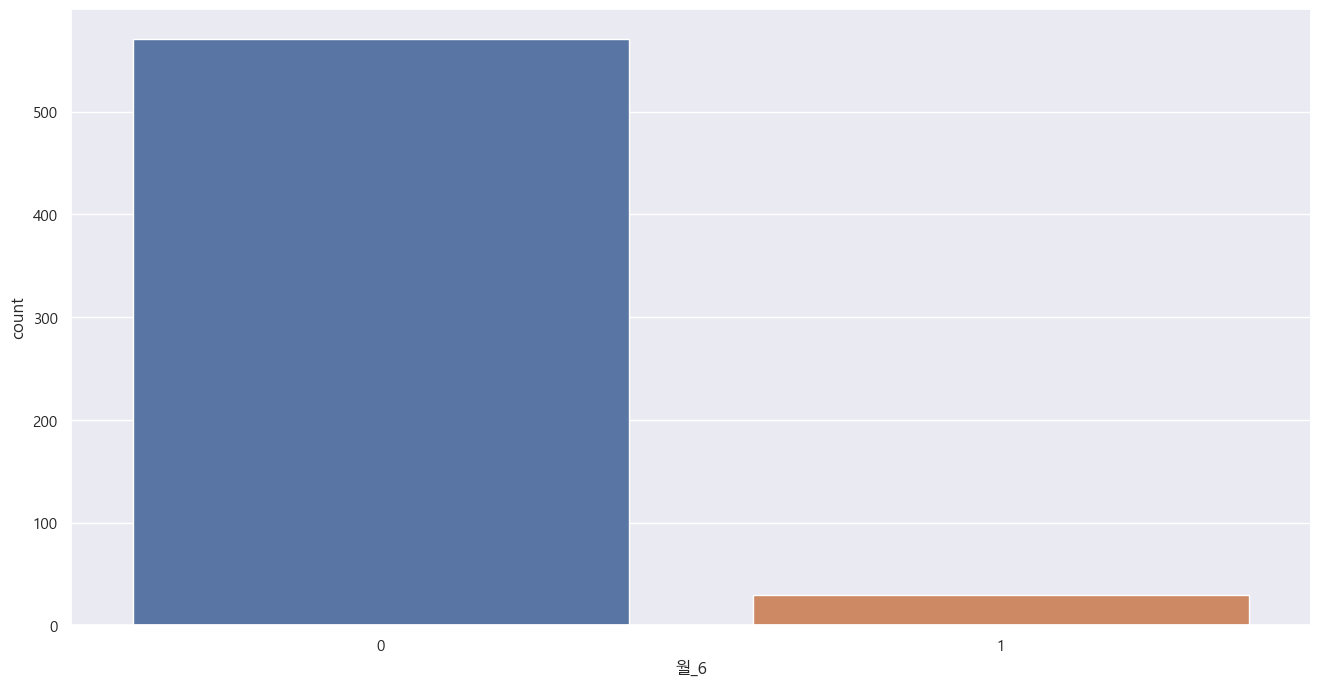

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    0.918333
1    0.081667
Name: 월_7, dtype: float64


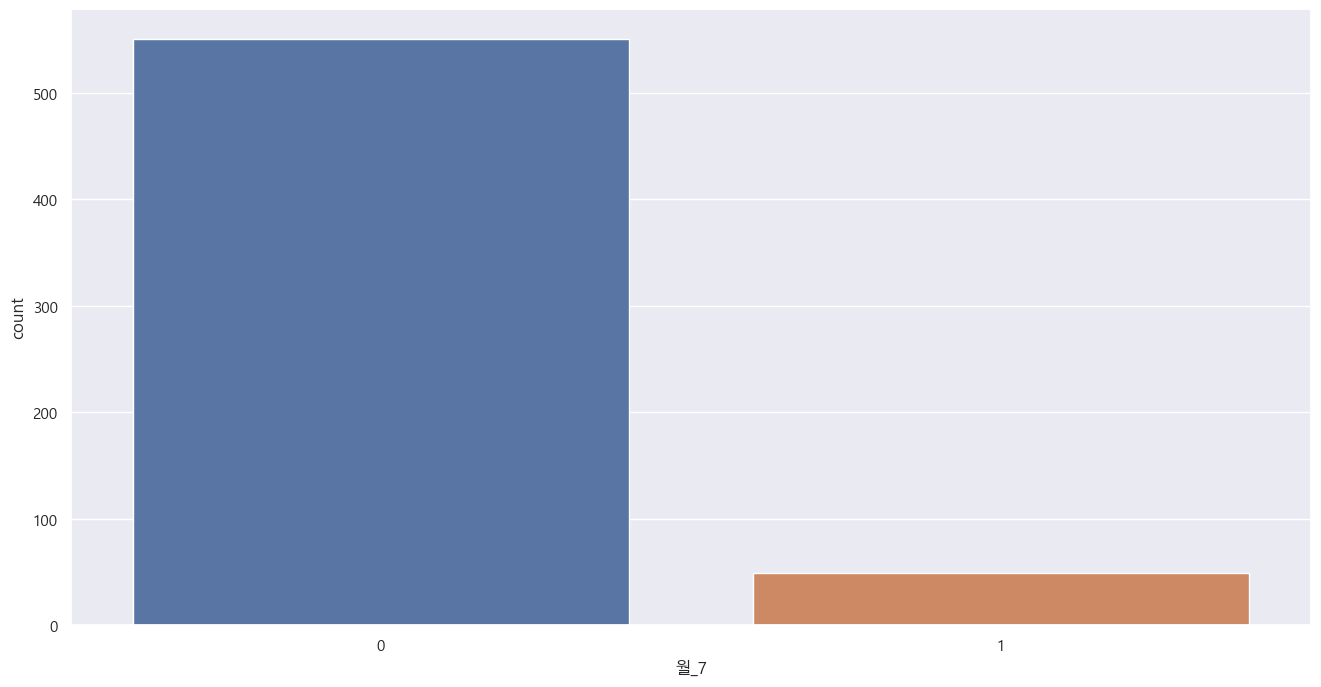

0    0.908333
1    0.091667
Name: 월_8, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


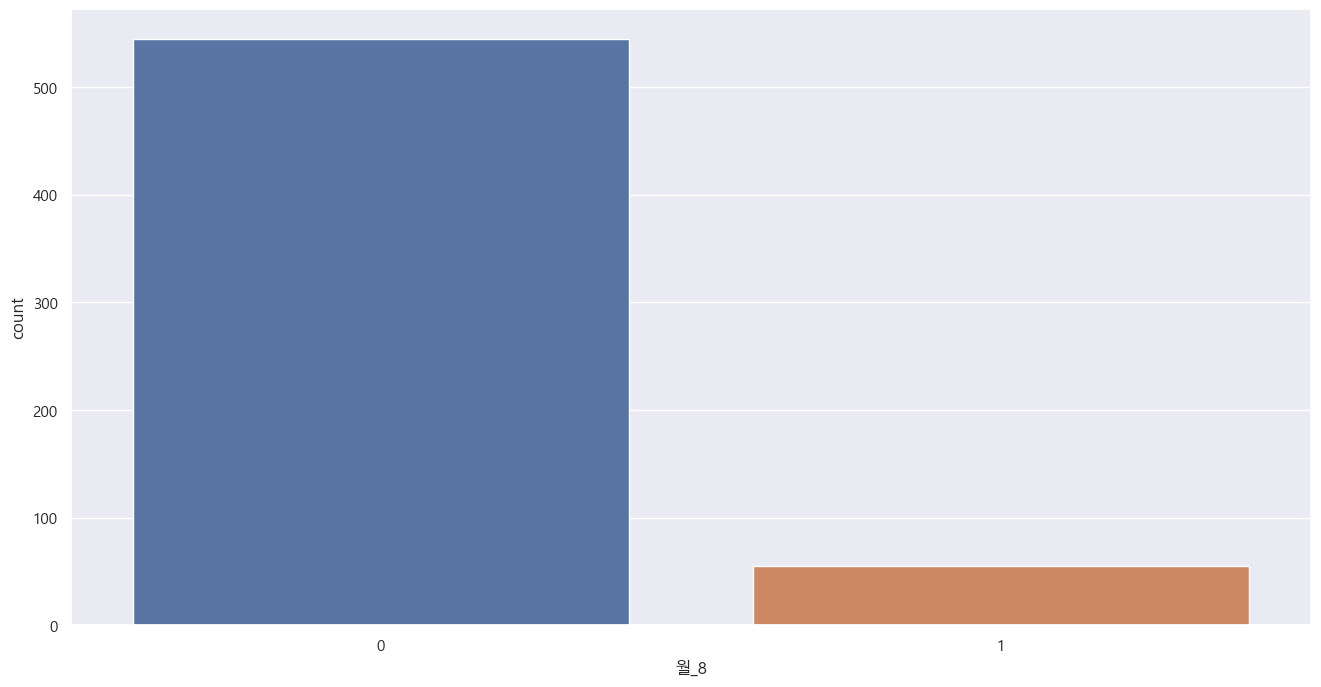

0    0.9
1    0.1
Name: 월_9, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


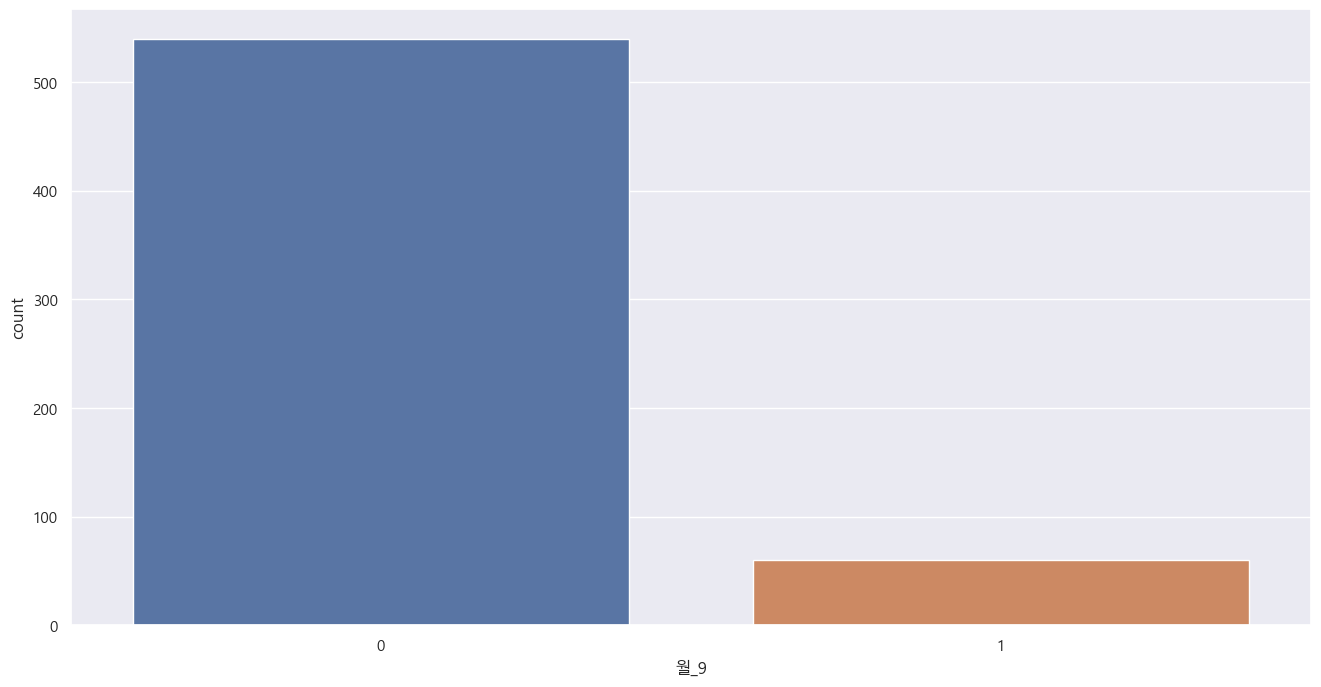

0    0.9
1    0.1
Name: 월_10, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


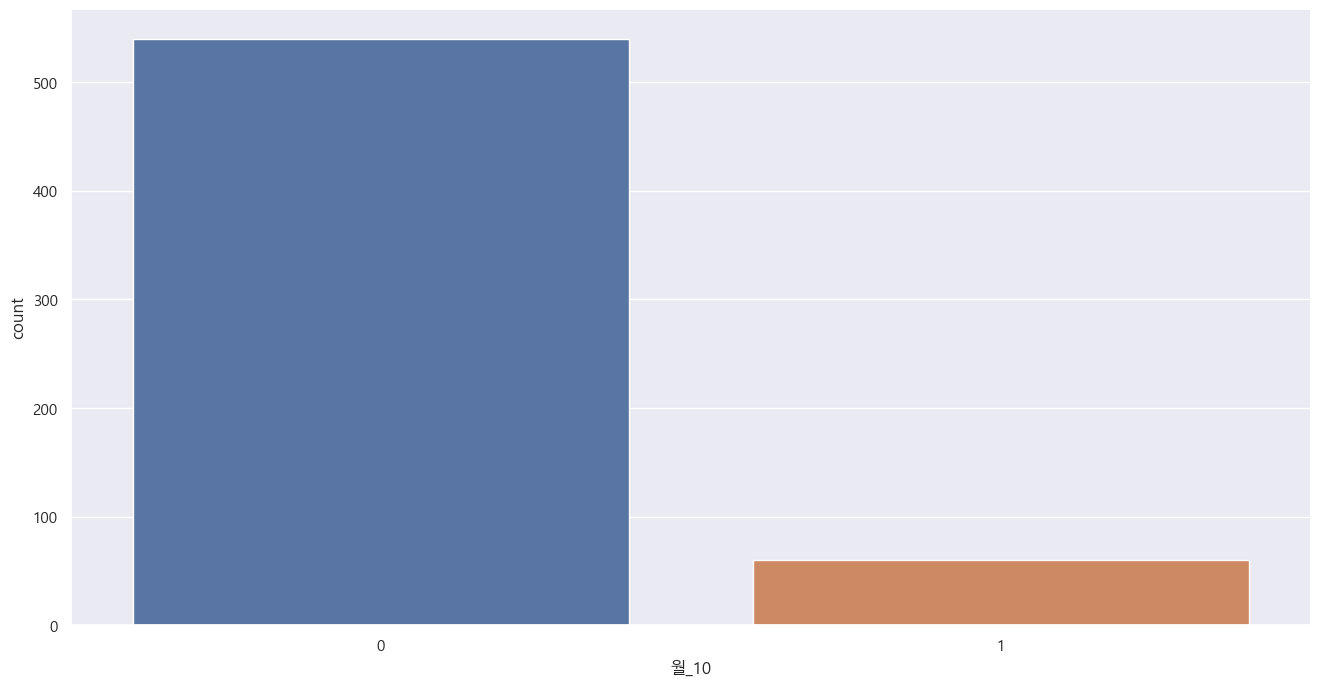

0    0.88
1    0.12
Name: 월_11, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


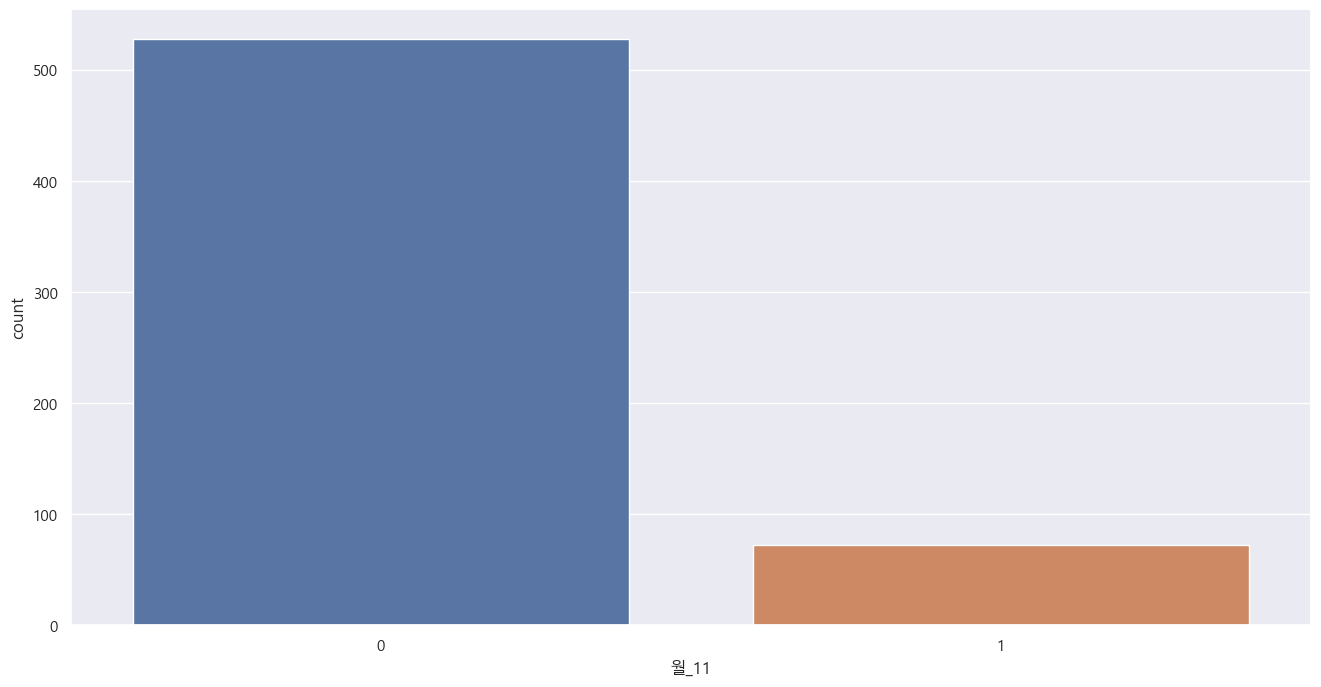

0    0.918333
1    0.081667
Name: 월_12, dtype: float64


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


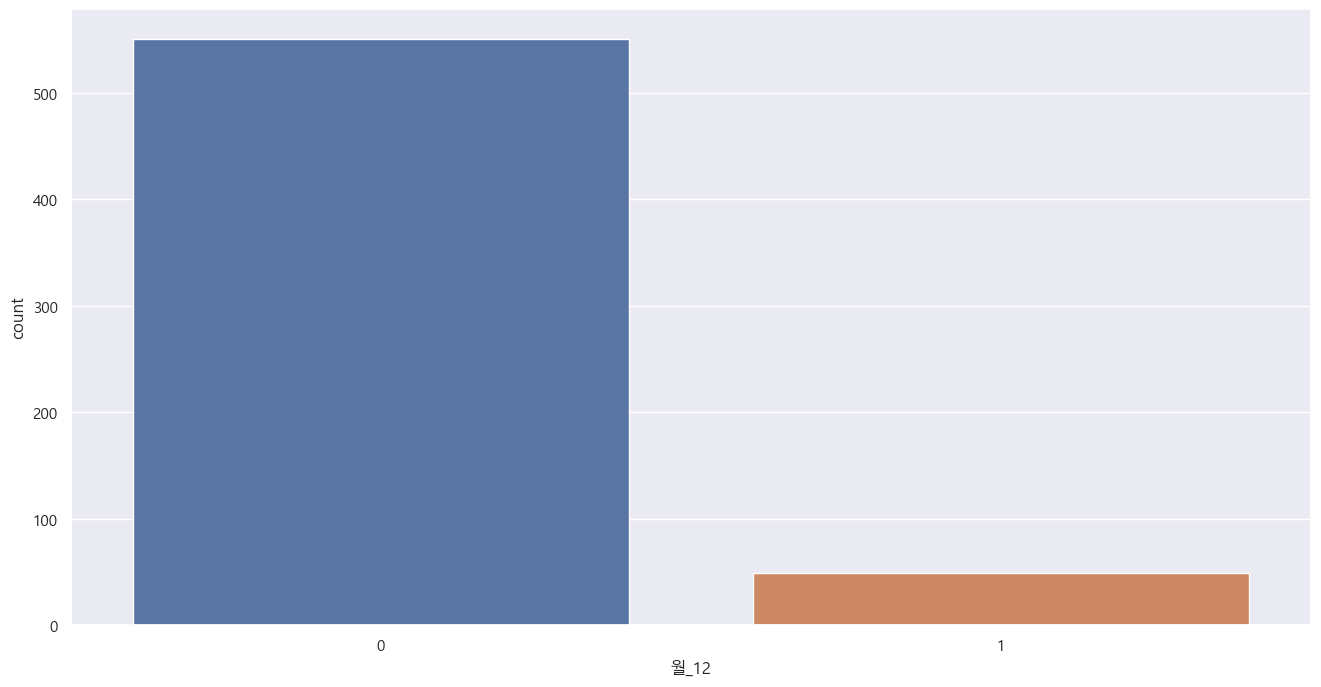

In [289]:
cat_lst = ['screening_rat','genre','distributor','년','월']

for col in data.columns:
    
    if col == 'release_time' : continue
    if col == 'title' : continue
    
    flag = True
    plt.figure(figsize=(16,8))
    for cat in cat_lst:
        if cat in col:
            da.Unvariate(data,col,'cat')
            flag = False
            break
        
    if flag:
        da.Unvariate(data,col,'num')
        
    
        

## 이변량 분석

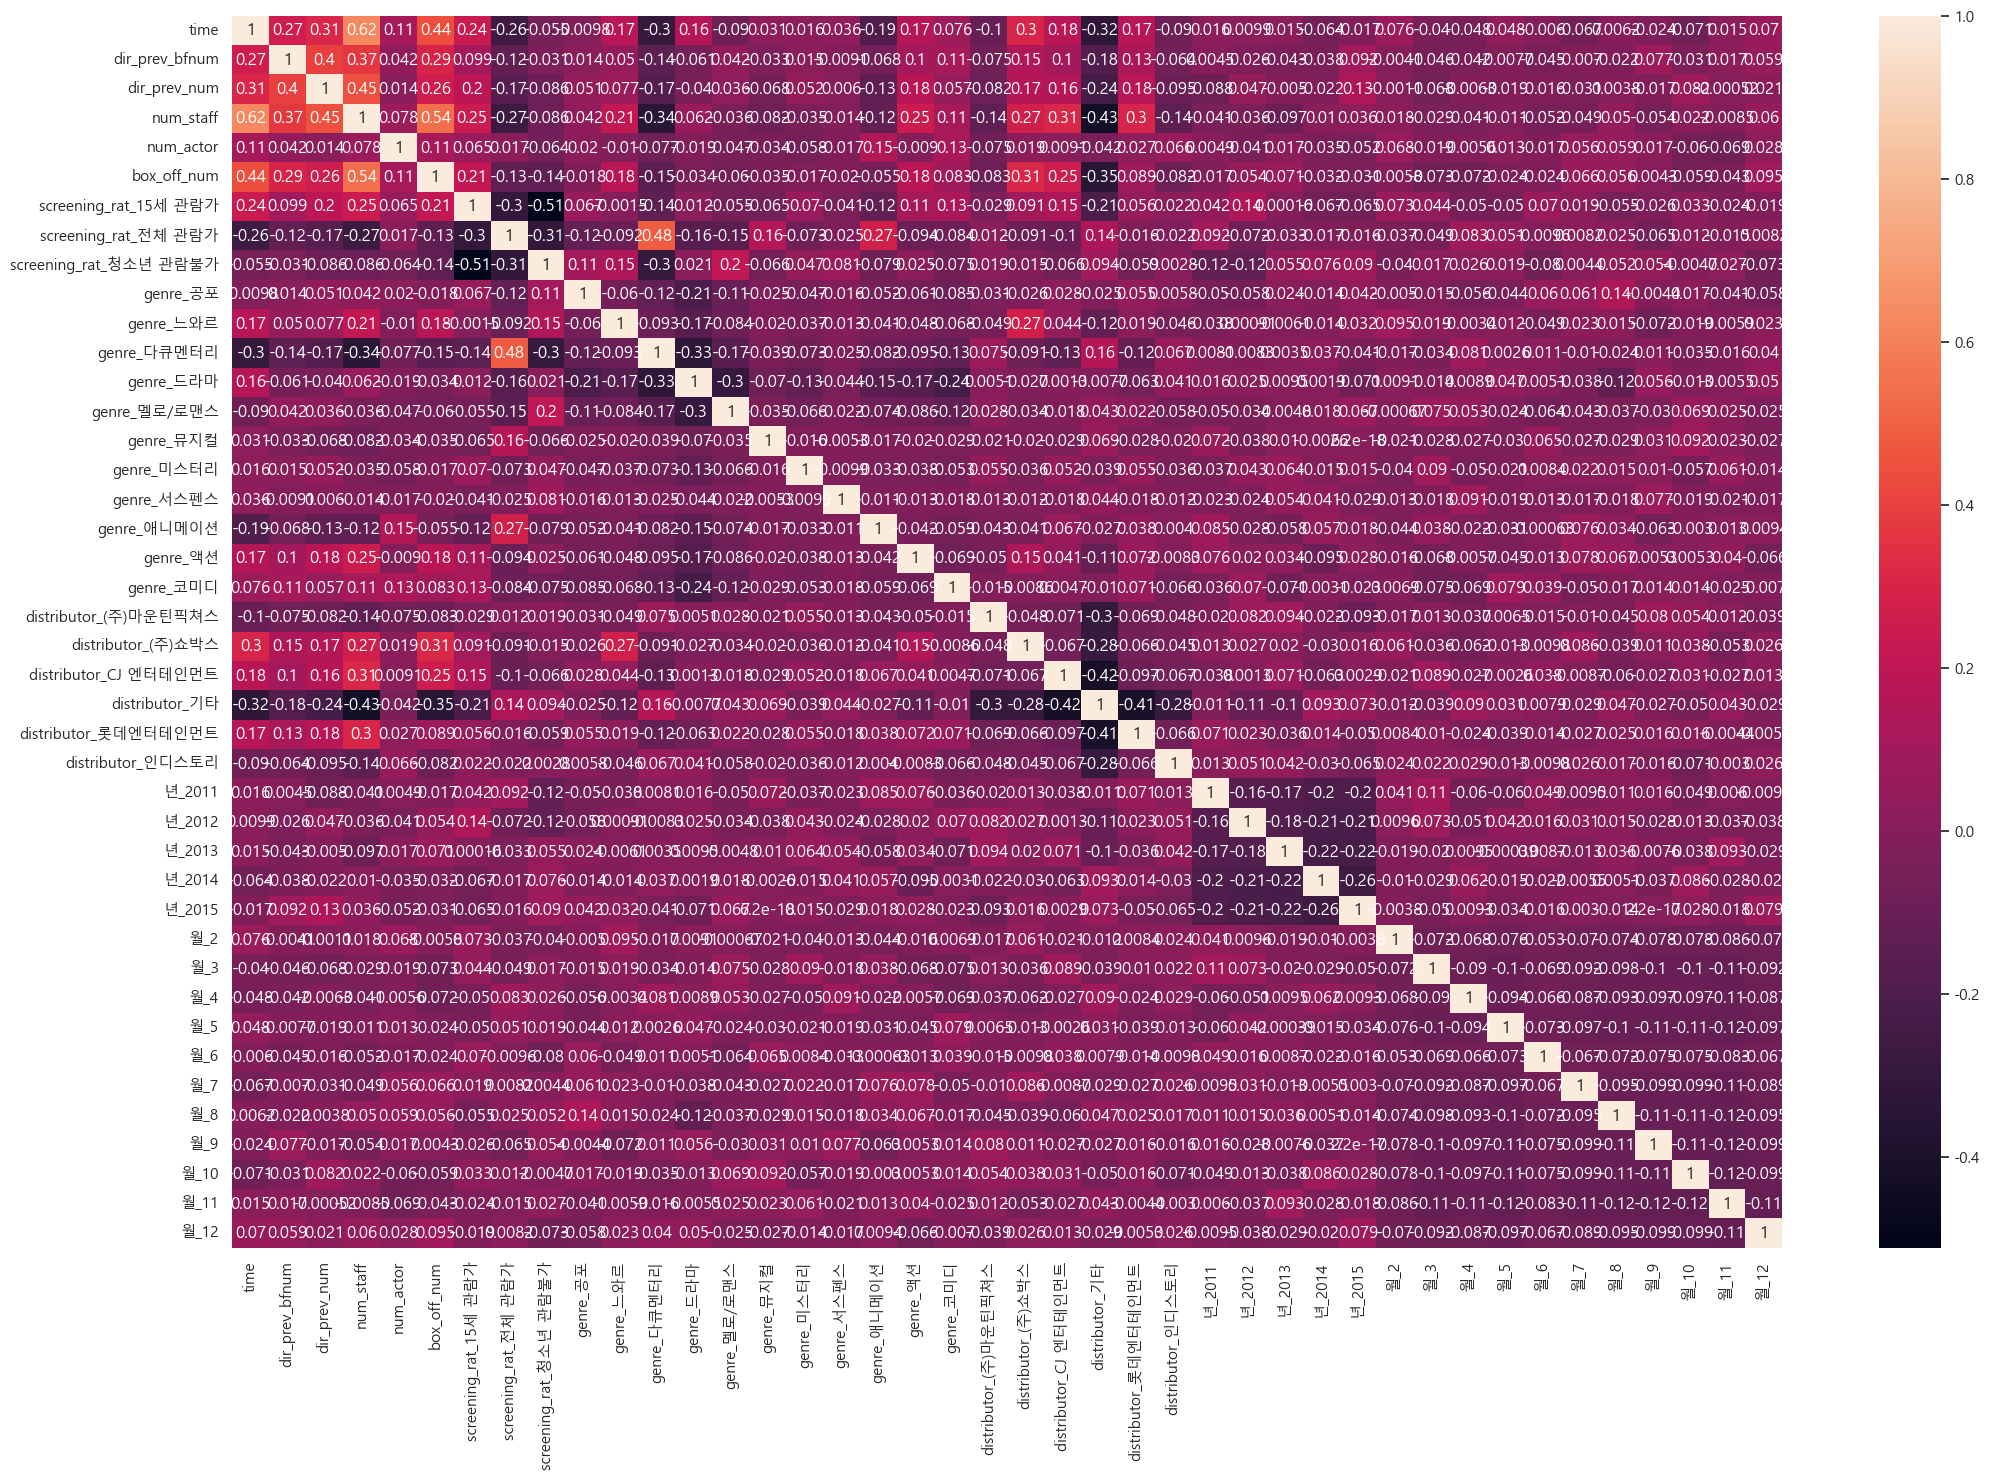

In [292]:
plt.figure(figsize=(25,16))

sns.heatmap(data.corr(),annot = True)
plt.show()

# 데이터 나누기

In [189]:
from sklearn.model_selection import train_test_split

In [294]:
x = data.drop(['box_off_num'],axis=1)
y = data['box_off_num']

In [295]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3,)

# 모델링

In [296]:
import Util_for_sklearn_ksw as ufs
from sklearn.inspection import permutation_importance

## LinearRegression

In [297]:
lst,df = ufs.forward_stepwise_linear(x_train,y_train)
print(lst)

['num_staff', 'distributor_(주)쇼박스', 'genre_드라마', '년_2013', '월_7', 'distributor_CJ 엔터테인먼트', 'dir_prev_bfnum', 'num_actor', '월_8', '월_3', '년_2012', 'dir_prev_num', 'screening_rat_청소년 관람불가', 'genre_느와르', 'genre_액션']


In [298]:
model_line = LinearRegression()
model_line.fit(x_train[lst],y_train)
pred_line = model_line.predict(x_val[lst])


In [299]:
ufs.Regressor_report(y_val,pred_line)

MAE :  898587.3610384671
MAPE :  2882.2508906590947
RMSE :  1574480.4330695518


## KNN

### 스케일링

In [300]:
from sklearn.preprocessing import MinMaxScaler

In [301]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

### CV

In [302]:
model_knn = KNeighborsRegressor()

params_knn = {'n_neighbors':range(5,15),'metric':['manhattan','euclidean']}

model_knn_g = GridSearchCV(model_knn,params_knn,cv=10,verbose=3)


In [303]:
model_knn_g.fit(x_train_s,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END ..metric=manhattan, n_neighbors=5;, score=0.596 total time=   0.0s
[CV 2/10] END .metric=manhattan, n_neighbors=5;, score=-2.076 total time=   0.0s
[CV 3/10] END .metric=manhattan, n_neighbors=5;, score=-0.213 total time=   0.0s
[CV 4/10] END ..metric=manhattan, n_neighbors=5;, score=0.525 total time=   0.0s
[CV 5/10] END .metric=manhattan, n_neighbors=5;, score=-0.233 total time=   0.0s
[CV 6/10] END ..metric=manhattan, n_neighbors=5;, score=0.197 total time=   0.0s
[CV 7/10] END ..metric=manhattan, n_neighbors=5;, score=0.328 total time=   0.0s
[CV 8/10] END ..metric=manhattan, n_neighbors=5;, score=0.571 total time=   0.0s
[CV 9/10] END .metric=manhattan, n_neighbors=5;, score=-0.038 total time=   0.0s
[CV 10/10] END .metric=manhattan, n_neighbors=5;, score=0.305 total time=   0.0s
[CV 1/10] END ..metric=manhattan, n_neighbors=6;, score=0.593 total time=   0.0s
[CV 2/10] END .metric=manhattan, n_neighbors=6

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(5, 15)},
             verbose=3)

### Feature Importance 확인

In [304]:
pfi_knn = permutation_importance(model_knn_g.best_estimator_, x_val_s, y_val, n_repeats=10, scoring = 'r2')

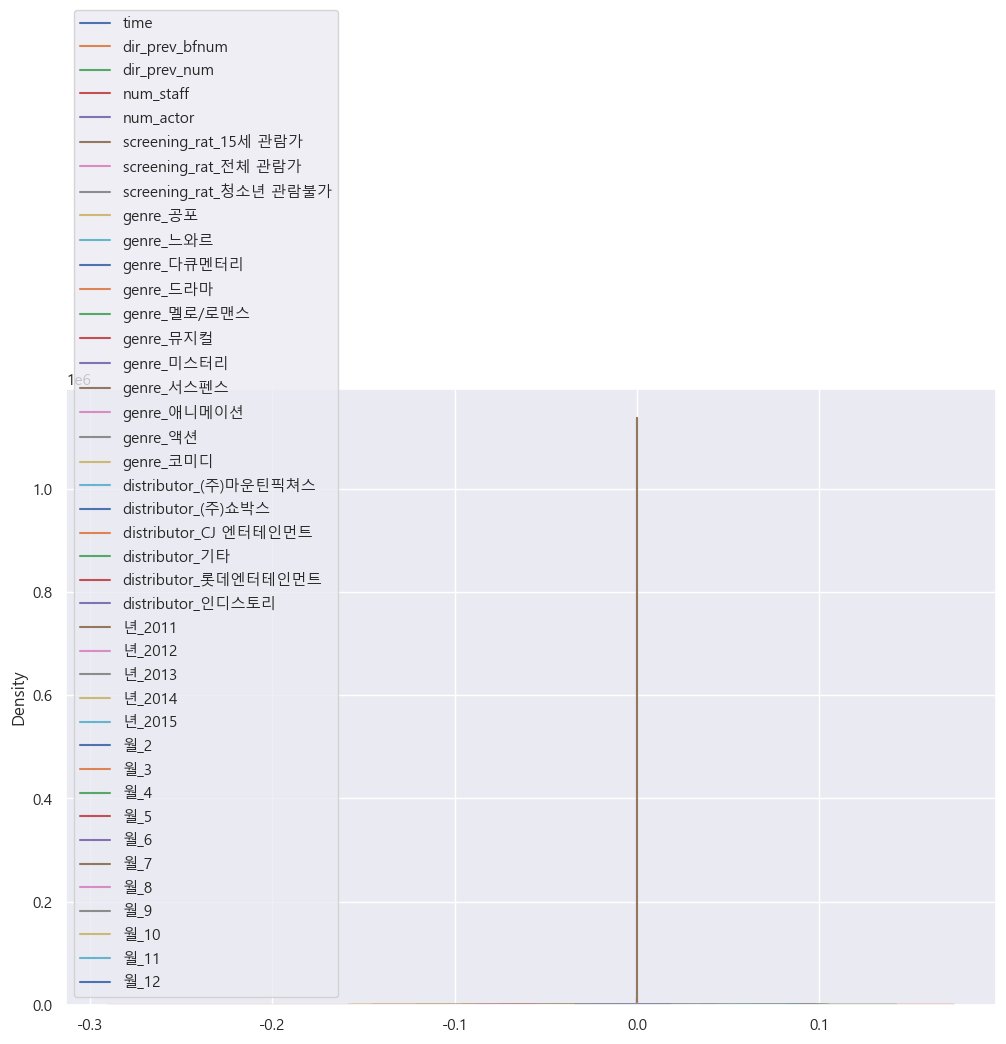

In [305]:
plt.figure(figsize = (12,8))
for i,vars in enumerate(list(x)) :
    sns.kdeplot(pfi_knn.importances[i], label = vars)

plt.legend()
plt.show()

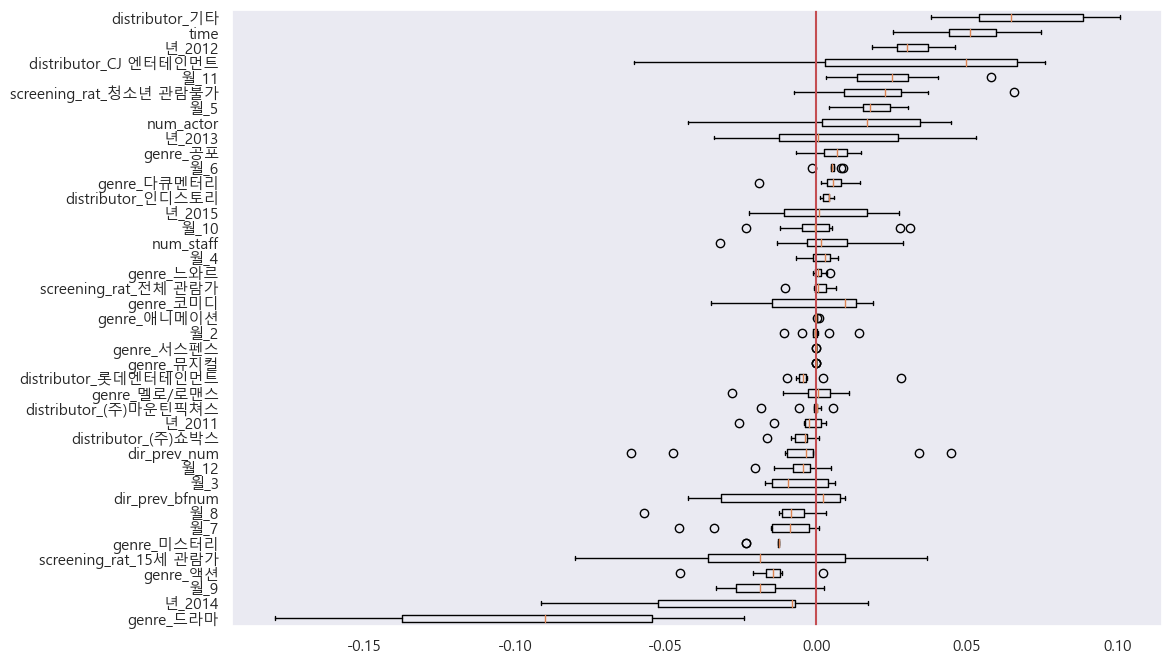

In [306]:
sorted_idx = pfi_knn.importances_mean.argsort()
plt.figure(figsize = (12,8))
plt.boxplot(pfi_knn.importances[sorted_idx].T, vert=False, labels=x.columns[sorted_idx])
plt.axvline(0, color = 'r')
plt.grid()
plt.show()

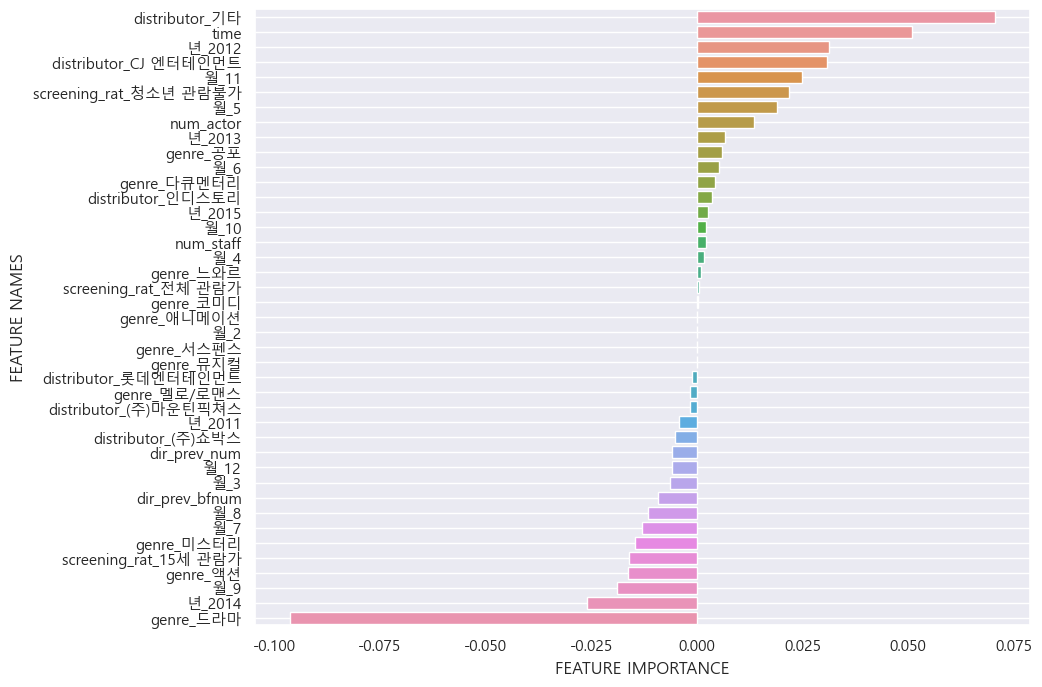

In [307]:
result = ufs.plot_feature_importance(pfi_knn.importances_mean, list(x_train))

In [308]:
pred_knn = model_knn_g.predict(x_val_s)

ufs.Regressor_report(y_val,pred_knn)

MAE :  660413.9844444445
MAPE :  215.70261411832658
RMSE :  1610633.1349901236


## RandomForest

In [309]:
model_rf = RandomForestRegressor()

params_rf = {'n_estimators':range(10,80,20),'max_depth':range(5,10),'min_samples_leaf':range(10,50,10)}

model_rf_g = GridSearchCV(model_rf,params_rf,cv=10,verbose=3)

In [310]:
model_rf_g.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[CV 1/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.395 total time=   0.0s
[CV 2/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=-0.545 total time=   0.0s
[CV 3/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.001 total time=   0.0s
[CV 4/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=-0.069 total time=   0.0s
[CV 5/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.426 total time=   0.0s
[CV 6/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.158 total time=   0.0s
[CV 7/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.265 total time=   0.0s
[CV 8/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.419 total time=   0.0s
[CV 9/10] END max_depth=5, min_samples_leaf=10, n_estimators=10;, score=0.428 total time=   0.0s
[CV 10/10] END max_depth=5, min_samples_leaf=10, n_estimators=

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(10, 50, 10),
                         'n_estimators': range(10, 80, 20)},
             verbose=3)

In [311]:
model_rf_g.best_params_

{'max_depth': 8, 'min_samples_leaf': 10, 'n_estimators': 30}

In [312]:
cv_rf = pd.DataFrame(model_rf_g.cv_results_)
cv_rf.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.024323      0.004352         0.004677        0.001536   
1       0.056042      0.005042         0.004617        0.000834   
2       0.125144      0.035744         0.008338        0.002495   
3       0.150819      0.022216         0.011542        0.008071   
4       0.017885      0.002222         0.003198        0.001157   

  param_max_depth param_min_samples_leaf param_n_estimators  \
0               5                     10                 10   
1               5                     10                 30   
2               5                     10                 50   
3               5                     10                 70   
4               5                     20                 10   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 10, 'n_es...           0.395260   
1  {'max_depth': 5, 'min_samples_leaf': 10, 'n_es...           0.397593   
2  {'max_depth': 5, 'min_samples_leaf': 10, 'n_es...           0.372475   
3  {'max_depth': 5, 'min_samples_leaf': 10, 'n_es...           0.373446   
4  {'max_depth': 5, 'min_samples_leaf': 20, 'n_es...           0.361155   

   split1_test_score  ...  split3_test_score  split4_test_score  \
0          -0.545476  ...          -0.069009           0.425719   
1          -0.485606  ...           0.023192           0.338973   
2          -0.149491  ...           0.048194           0.458005   
3          -0.417584  ...           0.123583           0.384449   
4          -0.320536  ...           0.035547           0.432527   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.157628           0.264697           0.419082           0.428004   
1           0.244254           0.250003           0.393836           0.459936   
2           0.286653           0.291761           0.414100           0.507840   
3           0.248409           0.300090           0.435635           0.517482   
4           0.318445           0.230086           0.364838           0.482147   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.435410         0.191233        0.302883               19  
1           0.393443         0.190279        0.283481               20  
2           0.434898         0.258935        0.222296                3  
3           0.424284         0.232041        0.270673               10  
4           0.388222         0.196411        0.285338               18  

[5 rows x 21 columns]

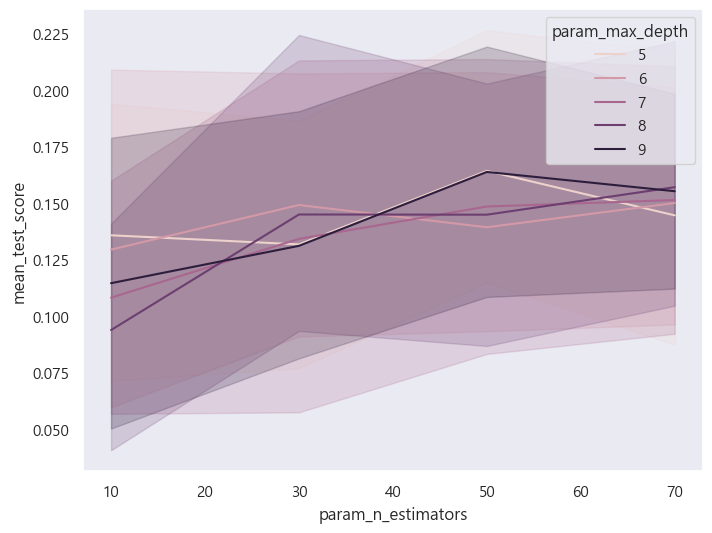

In [313]:
ufs.mean_test_score_lineplot(cv_rf,x='param_n_estimators',hue='param_max_depth')

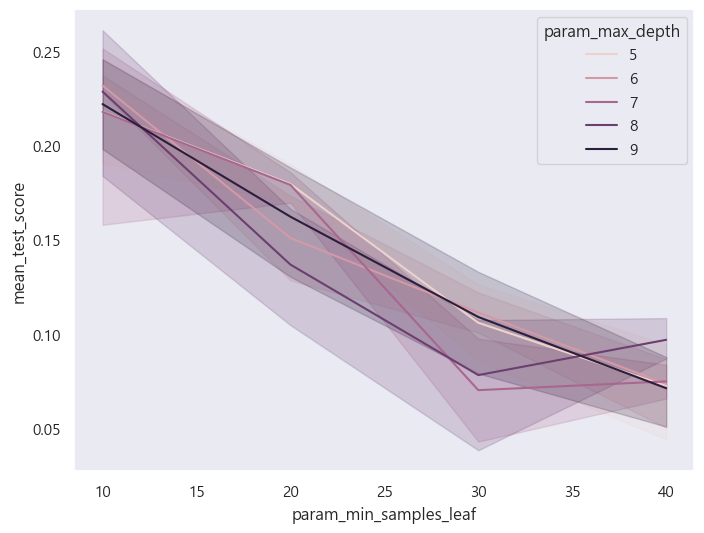

In [314]:
ufs.mean_test_score_lineplot(cv_rf,x='param_min_samples_leaf',hue='param_max_depth')

feature_names  feature_importance
0                num_staff        5.020525e-01
1                     time        3.405597e-01
2                genre_드라마        5.878807e-02
3           dir_prev_bfnum        2.883803e-02
4                   년_2013        2.175503e-02
5                num_actor        9.683040e-03
6           distributor_기타        9.422052e-03
7    distributor_CJ 엔터테인먼트        8.048239e-03
8    screening_rat_15세 관람가        6.266048e-03
9                   년_2015        4.421491e-03
10      distributor_(주)쇼박스        3.444976e-03
11            dir_prev_num        2.357725e-03
12    distributor_롯데엔터테인먼트        2.141050e-03
13                  년_2011        8.643594e-04
14                     월_7        6.735590e-04
15    screening_rat_전체 관람가        2.461377e-04
16             genre_애니메이션        1.880279e-04
17                    월_11        1.209312e-04
18                  년_2014        6.094184e-05
19                     월_6        3.532328e-05
20                     월_9        1.632163e-05
21                  년_2012        9.765685e-06
22  screening_rat_청소년 관람불가        4.289952e-06
23       distributor_인디스토리        1.621833e-06
24   distributor_(주)마운틴픽쳐스        3.473965e-07
25                     월_5        2.354980e-07
26               genre_코미디        1.486562e-07
27             genre_다큐멘터리        2.147346e-08
28            genre_멜로/로맨스        0.000000e+00
29                genre_공포        0.000000e+00
30                     월_2        0.000000e+00
31                     월_3        0.000000e+00
32                     월_4        0.000000e+00
33               genre_느와르        0.000000e+00
34                genre_액션        0.000000e+00
35              genre_서스펜스        0.000000e+00
36                     월_8        0.000000e+00
37              genre_미스터리        0.000000e+00
38                    월_10        0.000000e+00
39               genre_뮤지컬        0.000000e+00
40                    월_12        0.000000e+00

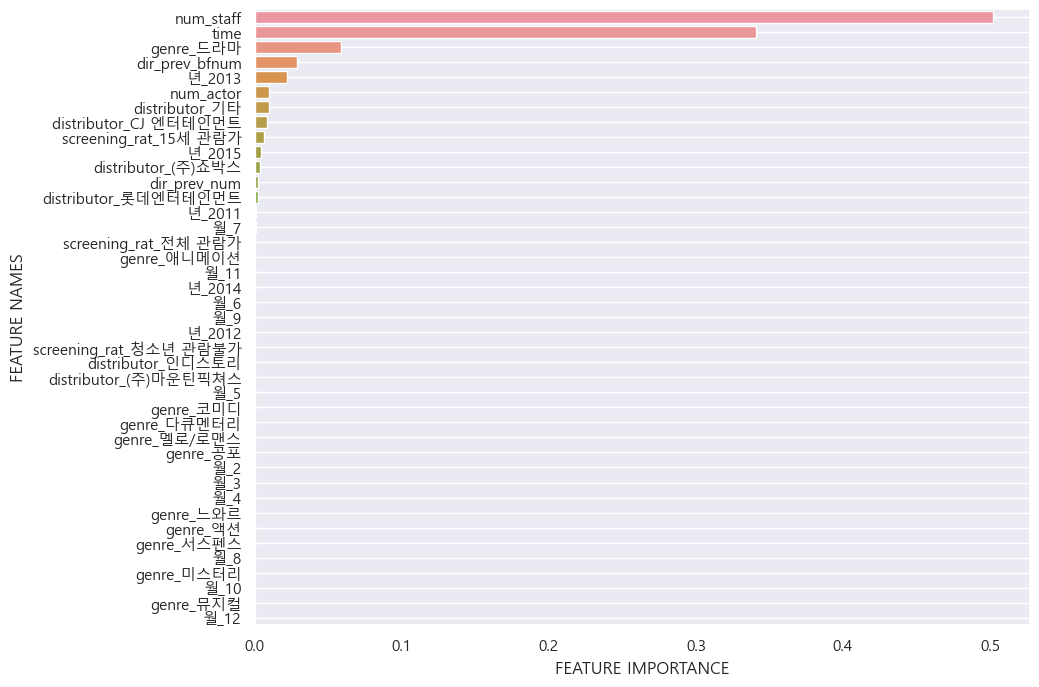

In [315]:
ufs.plot_feature_importance(model_rf_g.best_estimator_.feature_importances_,list(x_train))

In [316]:
pred_rf = model_rf_g.predict(x_val)

ufs.Regressor_report(y_val,pred_rf)

MAE :  624258.6304169487
MAPE :  375.1984988520665
RMSE :  1464134.260268016


## CatBoost

In [317]:
model_cbt = cbt.CatBoostRegressor()

params_cbt =    {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10 ,30,50,70, 100]
                 }

model_cbt_g = GridSearchCV(model_cbt,params_cbt,cv=10,verbose=3)

In [318]:
model_cbt_g.fit(x_train,y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
0:	learn: 1753181.3515889	total: 1.64ms	remaining: 14.8ms
1:	learn: 1748544.8073392	total: 2.57ms	remaining: 10.3ms
2:	learn: 1742820.7227811	total: 3.32ms	remaining: 7.74ms
3:	learn: 1737619.1019440	total: 4.13ms	remaining: 6.19ms
4:	learn: 1731555.9955370	total: 4.87ms	remaining: 4.87ms
5:	learn: 1726326.6005013	total: 5.73ms	remaining: 3.82ms
6:	learn: 1720929.9275218	total: 6.52ms	remaining: 2.79ms
7:	learn: 1714839.1953424	total: 7.27ms	remaining: 1.82ms
8:	learn: 1709951.4981386	total: 8.01ms	remaining: 889us
9:	learn: 1704954.6728212	total: 8.85ms	remaining: 0us
[CV 1/10] END depth=4, iterations=10, learning_rate=0.01;, score=0.008 total time=   0.0s
0:	learn: 1946113.7510505	total: 825us	remaining: 7.43ms
1:	learn: 1939183.1915402	total: 1.56ms	remaining: 6.25ms
2:	learn: 1932108.1780865	total: 2.28ms	remaining: 5.32ms
3:	learn: 1925201.0283687	total: 2.96ms	remaining: 4.44ms
4:	learn: 1918645.1689639	total: 3.64m

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000163E3B64B50>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 30, 50, 70, 100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             verbose=3)

In [319]:
pd_cbt = pd.DataFrame(model_cbt_g.cv_results_)
pd_cbt

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_depth  \
0         0.046512      0.003125         0.004272        0.000950           4   
1         0.046048      0.002366         0.003982        0.000447           4   
2         0.054076      0.006254         0.004788        0.001776           4   
3         0.048331      0.003780         0.004278        0.001941           4   
4         0.070657      0.005580         0.006494        0.004202           4   
..             ...           ...              ...             ...         ...   
135       2.411138      0.362844         0.008101        0.001991          10   
136       3.181600      0.522748         0.009147        0.003425          10   
137       3.347172      0.357442         0.007489        0.002496          10   
138       3.556536      0.454612         0.012411        0.007163          10   
139       3.583942      0.436846         0.010616        0.007879          10   

    param_iterations param_learning_rate  \
0                 10                0.01   
1                 10                0.02   
2                 10                0.03   
3                 10                0.04   
4                 30                0.01   
..               ...                 ...   
135               70                0.04   
136              100                0.01   
137              100                0.02   
138              100                0.03   
139              100                0.04   

                                                params  split0_test_score  \
0    {'depth': 4, 'iterations': 10, 'learning_rate'...           0.008392   
1    {'depth': 4, 'iterations': 10, 'learning_rate'...           0.040950   
2    {'depth': 4, 'iterations': 10, 'learning_rate'...           0.075341   
3    {'depth': 4, 'iterations': 10, 'learning_rate'...           0.100434   
4    {'depth': 4, 'iterations': 30, 'learning_rate'...           0.075731   
..                                                 ...                ...   
135  {'depth': 10, 'iterations': 70, 'learning_rate...           0.281392   
136  {'depth': 10, 'iterations': 100, 'learning_rat...           0.134049   
137  {'depth': 10, 'iterations': 100, 'learning_rat...           0.214141   
138  {'depth': 10, 'iterations': 100, 'learning_rat...           0.252303   
139  {'depth': 10, 'iterations': 100, 'learning_rat...           0.314513   

     split1_test_score  ...  split3_test_score  split4_test_score  \
0            -1.710443  ...          -0.016005           0.073963   
1            -1.443815  ...           0.045274           0.139003   
2            -1.170073  ...           0.101228           0.192916   
3            -0.996989  ...           0.145058           0.233497   
4            -1.210911  ...           0.097958           0.191422   
..                 ...  ...                ...                ...   
135          -0.100006  ...           0.272192           0.369324   
136          -0.448756  ...           0.188744           0.309288   
137          -0.151321  ...           0.264876           0.364395   
138          -0.180427  ...           0.294392           0.447864   
139          -0.177707  ...           0.270861           0.396202   

     split5_test_score  split6_test_score  split7_test_score  \
0             0.025324           0.031613           0.043885   
1             0.051959           0.062673           0.100719   
2             0.057815           0.082415           0.132929   
3             0.073539           0.098965           0.173898   
4             0.068549           0.085852           0.131643   
..                 ...                ...                ...   
135           0.130177           0.251830           0.310266   
136           0.094470           0.156318           0.198915   
137           0.138487           0.242625           0.308059   
138           0.148013           0.284330           0.322912   
139           0.149008           0.267690    

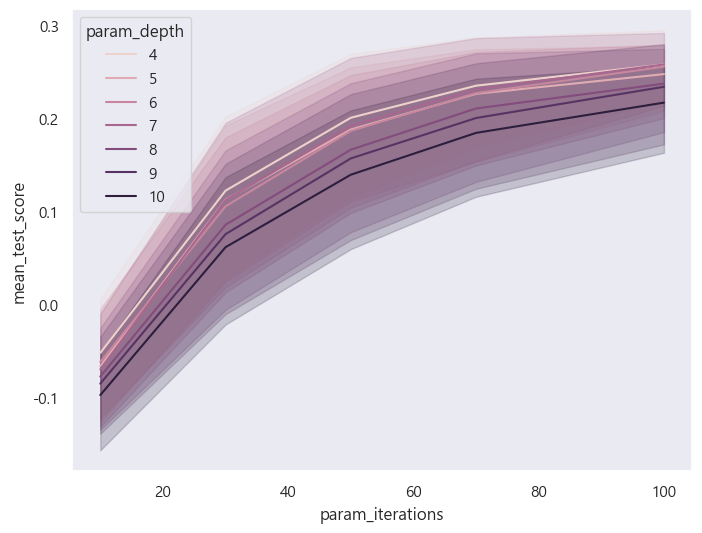

In [320]:
ufs.mean_test_score_lineplot(pd_cbt,x='param_iterations',hue='param_depth')

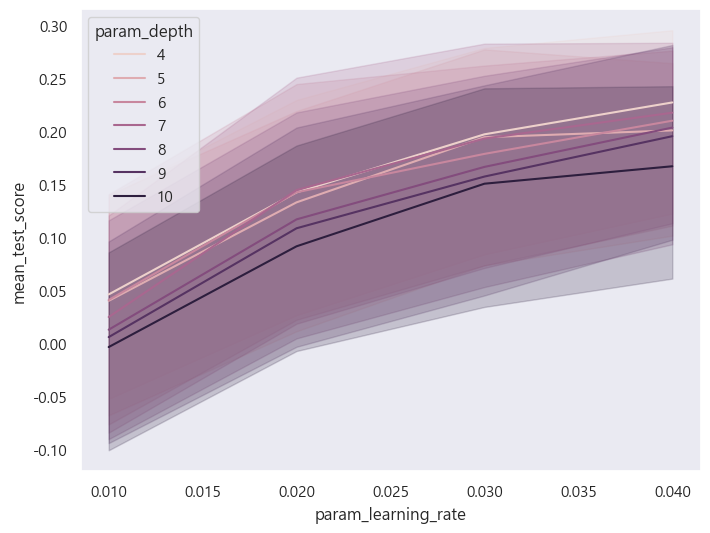

In [321]:
ufs.mean_test_score_lineplot(pd_cbt,x='param_learning_rate',hue='param_depth')

In [322]:
model_cbt_g.best_params_

{'depth': 4, 'iterations': 100, 'learning_rate': 0.04}

In [323]:
pred_cbt = model_cbt_g.predict(x_val)

ufs.Regressor_report(y_val,pred_cbt)

MAE :  623120.7888807745
MAPE :  722.3300514102763
RMSE :  1445779.3178732542


In [324]:
x_val

time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  \
144   101    1.069267e+04             3         29          5   
378    99    1.667359e+06             3        277          3   
170   104    1.047000e+03             1        239          2   
191    74    0.000000e+00             0          0          4   
597    99    0.000000e+00             0        123          4   
..    ...             ...           ...        ...        ...   
451   105    0.000000e+00             0        121          7   
208   106    2.853810e+05             1        302          4   
321    88    0.000000e+00             0          5          6   
486   127    4.210890e+06             3        572         22   
32     85    0.000000e+00             0         10          8   

     screening_rat_15세 관람가  screening_rat_전체 관람가  screening_rat_청소년 관람불가  \
144                      0                     0                       1   
378                      1                     0                       0   
170                      0                     0                       1   
191                      0                     1                       0   
597                      0                     0                       1   
..                     ...                   ...                     ...   
451                      0                     0                       1   
208                      0                     0                       1   
321                      0                     1                       0   
486                      0                     0                       0   
32                       0                     1                       0   

     genre_공포  genre_느와르  ...  월_3  월_4  월_5  월_6  월_7  월_8  월_9  월_10  월_11  \
144         0          0  ...    0    0    0    0    0    0    0     0     0   
378         1          0  ...    0    0    0    0    0    0    0     0     1   
170         0          0  ...    0    1    0    0    0    0    0     0     0   
191         0          0  ...    0    0    0    0    0    0    0     0     1   
597         1          0  ...    0    0    0    0    0    0    1     0     0   
..        ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
451         0          0  ...    0    0    1    0    0    0    0     0     0   
208         1          0  ...    0    0    1    0    0    0    0     0     0   
321         0          0  ...    0    0    0    0    0    0    0     1     0   
486         0          0  ...    0    0    0    0    0    1    0     0     0   
32          0          0  ...    0    1    0    0    0    0    0     0     0   

     월_12  
144     0  
378     0  
170     0  
191     0  
597     0  
..    ...  
451     0  
208     0  
321     0  
486     0  
32      0  

[180 rows x 41 columns]

---

# 테스트

In [332]:
test_data = pd.read_csv('./영화 관객수/movies_test.csv')

In [333]:
test_data['distributor'].value_counts()

CJ 엔터테인먼트          31
롯데엔터테인먼트           24
(주)마운틴픽쳐스          14
(주)쇼박스             12
골든타이드픽처스           12
                   ..
웃기씨네                1
오픈유컬쳐               1
CJ E&M Pictures     1
크리에이티브컴즈(주)         1
(주)씨타마운틴픽쳐스         1
Name: distributor, Length: 93, dtype: int64

In [326]:
distributor_list = test_data['distributor'].value_counts()[:6]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

test_data['distributor'] = test_data['distributor'].apply(lambda x : func(x))

In [327]:
test_data = pd.get_dummies(test_data,columns=['screening_rat','genre','distributor'],drop_first=True)

In [328]:
test = test_data.drop(['title','director','release_time'],axis=1)

In [329]:
test.head()

time  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  \
0   125    3.005290e+05             2        304          3   
1   113    3.427002e+05             4        275          3   
2   115    4.206611e+06             3        419          7   
3   116    6.913420e+05             2        408          2   
4   110    3.173800e+04             1        380          1   

   screening_rat_15세 관람가  screening_rat_전체 관람가  screening_rat_청소년 관람불가  \
0                      0                     0                       1   
1                      0                     0                       0   
2                      0                     0                       0   
3                      1                     0                       0   
4                      1                     0                       0   

   genre_공포  genre_느와르  ...  genre_서스펜스  genre_애니메이션  genre_액션  genre_코미디  \
0         0          1  ...           0            0         0          0   
1         0          0  ...           0            0         0          0   
2         0          0  ...           0            0         0          0   
3         0          0  ...           0            0         1          0   
4         1          0  ...           0            0         0          0   

   distributor_(주)쇼박스  distributor_CJ 엔터테인먼트  distributor_골든타이드픽처스  \
0                   0                      0                     0   
1                   1                      0                     0   
2                   0                      1                     0   
3                   1                      0                     0   
4                   0                      1                     0   

   distributor_기타  distributor_롯데엔터테인먼트  distributor_인디스토리  
0               1                     0                  0  
1               0                     0                  0  
2               0                     0                  0  
3               0                     0                  0  
4               0                     0                  0  

[5 rows x 25 columns]

In [330]:
pred_res = model_cbt_g.predict(test)

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:81: At position 19 should be feature with name distributor_(주)마운틴픽쳐스 (found distributor_(주)쇼박스).

In [233]:
ans = pd.DataFrame({'title': test_data['title'],
                   'box_off_num':pred_res} )

In [238]:
ans.set_index('title',inplace=True)

In [240]:
ans.to_csv('submission.csv')

In [56]:
submission = pd.read_csv('./영화 관객수/submission.csv')

In [57]:
submission.head()

title  box_off_num
0       용서는 없다            0
1  아빠가 여자를 좋아해            0
2          하모니            0
3          의형제            0
4        평행 이론            0